# WebScraping & Data Cleaning


In [1]:
import urllib.request 
import urllib.parse
import re
import urllib.error
import ssl
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup as BS
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 1 -- Alameda County

In [2]:
url1 = 'https://www.redfin.com/county/303/CA/Alameda-County'

ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE
request = Request(url1, headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'})
htmltext = urlopen(request).read()
soup = BS(htmltext,'html.parser')

# house prices in alameda county
Prices_1 = soup.findAll('span', attrs = {'class':'bp-Homecard__Price--value'})
Prices_1
alameda_County_prices = []
for price_tag in Prices_1:
    price_text = price_tag.text
    match = re.search(r'\$([\d,]+)', price_text)
    if match:
        alameda_County_prices.append(match.group(1))
    else:
        alameda_County_prices.append("N/A")  
alameda_County_prices =[price.replace(',', '') for price in alameda_County_prices]
print("house prices:",alameda_County_prices)
print(len(alameda_County_prices))
print('_________________________________________________________________')

# bedrooms in the houses that are there in alameda county
BedRooms = soup.findAll('span', attrs = {'class':'bp-Homecard__Stats--beds text-nowrap'})#.get_text()
alameda_beds = []
for bedroom_tag in BedRooms:
    bed_text = bedroom_tag.text
    match = re.search(r'(\d+)\s*bed', bed_text)
    if match:
        alameda_beds.append(match.group(1))
    else:
        alameda_beds.append("N/A")  

print("bedrooms:",alameda_beds)
print(len(alameda_beds))
print('_________________________________________________________________')

# bathrooms in the houses that are in alameda county
baths = soup.findAll('span', attrs = {'class':'bp-Homecard__Stats--baths text-nowrap'})#.get_text()
alameda_baths = []

for bathroom_tag in baths:
    bath_text = bathroom_tag.text
    match = re.search(r'(\d+(\.\d+)?)\s*baths?', bath_text)
    if match:
        alameda_baths.append(match.group(1))
    else:
        alameda_baths.append("N/A")

print("bathrooms:",alameda_baths)
print(len(alameda_baths))
print('_________________________________________________________________')

# sqft in the houses that are in alameda county
alameda_sft = soup.findAll('span', attrs = {'class':'bp-Homecard__Stats--sqft text-nowrap'})#.get_text()

alameda_sqft = []

for sqft_tag in alameda_sft:
    sqft_text = sqft_tag.text  # Extract text from BeautifulSoup Tag
    match = re.search(r'(\d{1,3}(,\d{3})*(\.\d+)?)', sqft_text)
    if match:
        alameda_sqft.append(match.group(1))
    else:
        alameda_sqft.append("N/A")

print("sqft:",alameda_sqft)
print(len(alameda_sqft))
print('_________________________________________________________________')

# lot area of the houses in alameda county
alameda_lot_details = soup.findAll('span',attrs = {'class':'bp-Homecard__Stats--lotsize text-ellipsis'})

alameda_lot_list = []

for item in alameda_lot_details:
    match = re.search(r'(\d{1,3}(,\d{3})*(\.\d+)?)', item.text)
    if match:
        alameda_lot_list.append(match.group(1))
    else:
        alameda_lot_list.append("N/A")

print("lot area:",alameda_lot_list)
print(len(alameda_lot_list))
print("___________________________________________")

# Conversion factor from acres to square feet
acres_to_sqft = 43560

# Initialize a new list to store the converted values
alameda_converted_lot_list = []

# Iterate through each value in lot_list
for value in alameda_lot_list:
    # Check if the value represents an area in acres (i.e., contains a decimal)
    if '.' in value:
        # Convert the value to square feet and append it to converted_lot_list
        alameda_converted_value = float(value) * acres_to_sqft
        alameda_converted_lot_list.append(round(alameda_converted_value, 2))  # Round to 2 decimal places
    else:
        # If the value does not represent an area in acres, append it as it is
        alameda_converted_lot_list.append(value)

print(alameda_converted_lot_list)
print(len(alameda_converted_lot_list))
print("___________________________________________")

# street, city, and zipcodes in the alameda county
HouseAddresses = soup.findAll('div', attrs = {'class':'bp-Homecard__Address flex align-center color-text-primary font-body-xsmall-compact'})
alameda_HouseAddresses = [address_tag.text for address_tag in HouseAddresses]
alameda_street_addresses = []
alameda_city = []
alameda_state = []
alameda_zip_codes = []

for address in alameda_HouseAddresses:
    components = address.split(', ')
    alameda_street_addresses.append(components[0])
    alameda_city.append(components[1])
    state_zip = components[2].split(' ')
    alameda_state.append(state_zip[0])
    alameda_zip_codes.append(state_zip[1])

print("Street Addresses:", alameda_street_addresses)
print(len(alameda_street_addresses))
print('___________________________________________________')
print("City:", alameda_city)
print(len(alameda_city))
print('___________________________________________________')
print("States:", alameda_state)
print(len(alameda_state))
print('___________________________________________________')
print("Zip Codes:", alameda_zip_codes)
print(len(alameda_zip_codes))
print('___________________________________________________')

# individual urls
alameda_urls = []
page_url = url1
req = Request(page_url, headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req).read()
soup = BS(webpage,'html.parser')
pattern=re.compile("^\/CA")
for x in soup.findAll('a', attrs={'href': pattern }):
    x = "https://www.redfin.com"+ x.get('href')
    if (x not in alameda_urls):
        alameda_urls.append(x)
print("urls:",alameda_urls)
print(len(alameda_urls))
print('___________________________________________________')

# creating a county list
alameda_county = 'Alameda Conty'
alameda_county_list = [alameda_county] * 40

print("county:",alameda_county_list)
print('___________________________________________________')


# creating a dataframe
alameda_df = pd.DataFrame( columns =['Alameda_House_Price','Alameda_Sqft','Alameda_Lot_Area','Alameda_Street_Address','Alameda_City','Alameda_Zip_Codes','Alameda_County','Alameda_Urls_list'])
alameda_df.Alameda_House_Price =alameda_County_prices
alameda_df.Alameda_Urls_list = alameda_urls
alameda_df.Alameda_City = alameda_city
alameda_df.Alameda_Sqft = alameda_sqft
alameda_df.Alameda_Zip_Codes = alameda_zip_codes
alameda_df.Alameda_Street_Address = alameda_street_addresses
alameda_df.Alameda_Lot_Area = alameda_converted_lot_list
alameda_df.Alameda_County = alameda_county_list
alameda_df

house prices: ['1499000', '375000', '725000', '1549000', '1199000', '1195000', '1799000', '675000', '1688000', '1249000', '998000', '399000', '899880', '397000', '898000', '1095000', '1598000', '999800', '849900', '570000', '1868000', '1089000', '825000', '1649900', '1490000', '1899000', '2899950', '2350000', '739000', '899900', '845000', '1095000', '2495000', '850000', '1599000', '1200000', '1095000', '995000', '2195000', '975000']
40
_________________________________________________________________
bedrooms: ['5', '1', '2', '4', '4', '3', '3', '2', '4', '3', '3', '1', '3', '0', '2', '3', '3', '3', '8', '1', '5', '3', '2', '4', '5', '5', '4', '5', '3', '2', 'N/A', '3', '4', '3', '3', '3', '3', '4', '4', '3']
40
_________________________________________________________________
bathrooms: ['3', '1', '1', '2', '2', '2.5', '2', '1', '2', '2.5', '2.5', '1', '2', '1', '2.5', '2', '2.5', '2', '4', '1', '3.5', '2.5', '1', '3', '2.5', '3', '4.5', '3.5', '1', '2', 'N/A', '2', '4.5', '3', '2.5',

,Alameda_House_Price,Alameda_Sqft,Alameda_Lot_Area,Alameda_Street_Address,Alameda_City,Alameda_Zip_Codes,Alameda_County,Alameda_Urls_list
0,1499000,"2,140","6,840",6790 Edgewater Ln,Livermore,94551,Alameda Conty,https://www.redfin.com/CA/Livermore/6790-Edgew...
1,375000,828,N/A,1087 Murrieta Blvd #349,Livermore,94550,Alameda Conty,https://www.redfin.com/CA/Livermore/1087-Murri...
2,725000,"1,134","4,500",22738 2nd St,Hayward,94541,Alameda Conty,https://www.redfin.com/CA/Hayward/22738-2nd-St...
3,1549000,"1,450","4,500",4474 Macbeth Cir,Fremont,94555,Alameda Conty,https://www.redfin.com/CA/Fremont/4474-Macbeth...
4,1199000,"1,561","7,811",236 Chalmette Rd,Livermore,94551,Alameda Conty,https://www.redfin.com/CA/Livermore/236-Chalme...
5,1195000,"1,576","3,000",6248 Jarvis Ave,Newark,94560,Alameda Conty,https://www.redfin.com/CA/Newark/6248-Jarvis-A...
6,1799000,"1,750","8,000",37076 2nd,Fremont,94536,Alameda Conty,https://www.redfin.com/CA/Fremont/37076-2nd-St...
7,675000,"1,116","2,450",4981 Fairfax Ave,Oakland,94601,Alameda Conty,https://www.redfin.com/CA/Oakland/4981-Fairfax...
8,1688000,"1,340","5,400",3680 Yorktown Rd,Fremont,94538,Alameda Conty,https://www.redfin.com/CA/Fremont/3680-Yorktow...
9,1249000,"1,514","6,709",5987 Pompei Ter #133,Fremont,94555,Alameda Conty,https://www.redfin.com/CA/Fremont/5987-Pompei-...


# 2 -- SF County

In [3]:
url2 = 'https://www.redfin.com/county/340/CA/San-Francisco-County'

ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE
request = Request(url2, headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'})
htmltext = urlopen(request).read()
soup = BS(htmltext,'html.parser')

# house prices in sf county
Prices_2 = soup.findAll('span', attrs = {'class':'bp-Homecard__Price--value'})
Prices_2
sf_County_prices = []
for price_tag in Prices_2:
    price_text = price_tag.text
    match = re.search(r'\$([\d,]+)', price_text)
    if match:
        sf_County_prices.append(match.group(1))
    else:
        sf_County_prices.append("N/A")  
sf_County_prices =[price.replace(',', '') for price in sf_County_prices]
print("house prices:",sf_County_prices)
print(len(sf_County_prices))
print('_________________________________________________________________')

# bedrooms in the houses that are there in sf county
BedRooms = soup.findAll('span', attrs = {'class':'bp-Homecard__Stats--beds text-nowrap'})#.get_text()
sf_beds = []
for bedroom_tag in BedRooms:
    bed_text = bedroom_tag.text
    match = re.search(r'(\d+)\s*bed', bed_text)
    if match:
        sf_beds.append(match.group(1))
    else:
        sf_beds.append("N/A")  

print("bedrooms:",sf_beds)
print(len(sf_beds))
print('_________________________________________________________________')

# bathrooms in the houses that are in sf county
baths = soup.findAll('span', attrs = {'class':'bp-Homecard__Stats--baths text-nowrap'})#.get_text()
sf_baths = []

for bathroom_tag in baths:
    bath_text = bathroom_tag.text
    match = re.search(r'(\d+(\.\d+)?)\s*baths?', bath_text)
    if match:
        sf_baths.append(match.group(1))
    else:
        sf_baths.append("N/A")

print("bathrooms:",sf_baths)
print(len(sf_baths))
print('_________________________________________________________________')

# sqft in the houses that are in sf county
sf_sft = soup.findAll('span', attrs = {'class':'bp-Homecard__Stats--sqft text-nowrap'})#.get_text()

sf_sqft = []

for sqft_tag in sf_sft:
    sqft_text = sqft_tag.text  # Extract text from BeautifulSoup Tag
    match = re.search(r'(\d{1,3}(,\d{3})*(\.\d+)?)', sqft_text)
    if match:
        sf_sqft.append(match.group(1))
    else:
        sf_sqft.append("N/A")

print("sqft:",sf_sqft)
print(len(sf_sqft))
print('_________________________________________________________________')

# lot area of the houses in sf county
sf_lot_details = soup.findAll('span',attrs = {'class':'bp-Homecard__Stats--lotsize text-ellipsis'})

sf_lot_list = []

for item in sf_lot_details:
    match = re.search(r'(\d{1,3}(,\d{3})*(\.\d+)?)', item.text)
    if match:
        sf_lot_list.append(match.group(1))
    else:
        sf_lot_list.append("N/A")

print("lot area:",sf_lot_list)
print(len(sf_lot_list))
print("___________________________________________")

# Conversion factor from acres to square feet
acres_to_sqft = 43560

# Initialize a new list to store the converted values
sf_converted_lot_list = []

# Iterate through each value in lot_list
for value in sf_lot_list:
    # Check if the value represents an area in acres (i.e., contains a decimal)
    if '.' in value:
        # Convert the value to square feet and append it to converted_lot_list
        sf_converted_value = float(value) * acres_to_sqft
        sf_converted_lot_list.append(round(sf_converted_value, 2))  # Round to 2 decimal places
    else:
        # If the value does not represent an area in acres, append it as it is
        sf_converted_lot_list.append(value)

print(sf_converted_lot_list)
print(len(sf_converted_lot_list))
print("___________________________________________")

# street, city, and zipcodes in the sf county
HouseAddresses = soup.findAll('div', attrs = {'class':'bp-Homecard__Address flex align-center color-text-primary font-body-xsmall-compact'})
sf_HouseAddresses = [address_tag.text for address_tag in HouseAddresses]
sf_street_addresses = []
sf_city = []
sf_state = []
sf_zip_codes = []

for address in sf_HouseAddresses:
    components = address.split(', ')
    sf_street_addresses.append(components[0])
    sf_city.append(components[1])
    state_zip = components[2].split(' ')
    sf_state.append(state_zip[0])
    sf_zip_codes.append(state_zip[1])

print("Street Addresses:", sf_street_addresses)
print(len(sf_street_addresses))
print('___________________________________________________')
print("City:", sf_city)
print(len(sf_city))
print('___________________________________________________')
print("States:", sf_state)
print(len(sf_state))
print('___________________________________________________')
print("Zip Codes:", sf_zip_codes)
print(len(sf_zip_codes))
print('___________________________________________________')

# individual urls
sf_urls = []
page_url = url2
req = Request(page_url, headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req).read()
soup = BS(webpage,'html.parser')
pattern=re.compile("^\/CA")
for x in soup.findAll('a', attrs={'href': pattern }):
    x = "https://www.redfin.com"+ x.get('href')
    if (x not in sf_urls):
        sf_urls.append(x)
print("urls:",sf_urls)
print(len(sf_urls))
print('___________________________________________________')

# creating a county list
sf_county = 'SanFrancisco Conty'
sf_county_list = [sf_county] * 40

print("county:",sf_county_list)
print('___________________________________________________')


# creating a dataframe
SanFrans_df = pd.DataFrame( columns =['SanFrans_House_Price','SanFrans_Sqft','SanFrans_Lot_Area','SanFrans_Street_Address','SanFrans_City','SanFrans_Zip_Codes','SanFrans_County','SanFrans_Urls_list'])
SanFrans_df.SanFrans_House_Price =sf_County_prices
SanFrans_df.SanFrans_Urls_list = sf_urls
SanFrans_df.SanFrans_City = sf_city
SanFrans_df.SanFrans_Sqft = sf_sqft
SanFrans_df.SanFrans_Zip_Codes = sf_zip_codes
SanFrans_df.SanFrans_Street_Address = sf_street_addresses
SanFrans_df.SanFrans_Lot_Area = sf_converted_lot_list
SanFrans_df.SanFrans_County = sf_county_list
SanFrans_df

house prices: ['949888', '1150000', '2495000', '1095000', '1995000', '1150000', '995000', '1695000', '14750000', '2995000', '1995000', '998000', '1350000', '1391000', '799000', '1200000', '795000', '1780000', '1400000', '10600000', '1500000', '1195000', '1398000', '779000', '1795000', '1300000', '1100000', '795000', '1295000', '899000', '345000', '3695000', '4600000', '4695000', '3000000', '2199000', '1495000', '1349000', '3450000', '1095000']
40
_________________________________________________________________
bedrooms: ['1', '2', '3', '3', '4', '2', '2', '2', '4', '3', '3', '2', '6', '2', '2', '2', '1', '6', '3', '6', '6', '2', '1', '2', '2', '3', '3', '4', '8', '3', '2', '4', '4', '4', '0', '4', '3', '3', '3', '2']
40
_________________________________________________________________
bathrooms: ['1', '1.5', '3.5', '2', '4', '2', '1', '2', '4.5', '3', '2', '2', '4.5', '2', '1', '1', '1', '4', '2', '3.5', 'N/A', '1', '2', '2', '2', '2', '1', '3', '4', '1', '1', '3.5', '2.5', '4.5', 'N/

,SanFrans_House_Price,SanFrans_Sqft,SanFrans_Lot_Area,SanFrans_Street_Address,SanFrans_City,SanFrans_Zip_Codes,SanFrans_County,SanFrans_Urls_list
0,949888,"1,020",N/A,1435 Bay St #2,San Francisco,94123,SanFrancisco Conty,https://www.redfin.com/CA/San-Francisco/1435-B...
1,1150000,"1,050",N/A,1045 York St Unit B,San Francisco,94110,SanFrancisco Conty,https://www.redfin.com/CA/San-Francisco/1045-Y...
2,2495000,"2,845",N/A,1918 Jackson St,San Francisco,94109,SanFrancisco Conty,https://www.redfin.com/CA/San-Francisco/1918-J...
3,1095000,"1,700","3,260",2400 Ulloa St,San Francisco,94116,SanFrancisco Conty,https://www.redfin.com/CA/San-Francisco/2400-U...
4,1995000,"2,889","2,100",649 44th Ave #4226,San Francisco,94121,SanFrancisco Conty,https://www.redfin.com/CA/San-Francisco/649-44...
5,1150000,"1,183",N/A,555 4th St #522,San Francisco,94107,SanFrancisco Conty,https://www.redfin.com/CA/San-Francisco/555-4t...
6,995000,987,"1,100",314 Lily St,San Francisco,94102,SanFrancisco Conty,https://www.redfin.com/CA/San-Francisco/314-Li...
7,1695000,"1,300",N/A,1601 Larkin St #202,San Francisco,94109,SanFrancisco Conty,https://www.redfin.com/CA/San-Francisco/1601-L...
8,14750000,"5,050","3,815",2870 Pacific Ave,San Francisco,94115,SanFrancisco Conty,https://www.redfin.com/CA/San-Francisco/2870-P...
9,2995000,"1,896",N/A,2785 Jackson St #2,San Francisco,94115,SanFrancisco Conty,https://www.redfin.com/CA/San-Francisco/2785-J...


# 3 -- Solano County

In [4]:
url3 = 'https://www.redfin.com/county/350/CA/Solano-County'

ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE
request = Request(url3, headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'})
htmltext = urlopen(request).read()
soup = BS(htmltext,'html.parser')

# house prices in solano county
Prices_3 = soup.findAll('span', attrs = {'class':'bp-Homecard__Price--value'})
Prices_3
solano_County_prices = []
for price_tag in Prices_3:
    price_text = price_tag.text
    match = re.search(r'\$([\d,]+)', price_text)
    if match:
        solano_County_prices.append(match.group(1))
    else:
        solano_County_prices.append("N/A")  
solano_County_prices =[price.replace(',', '') for price in solano_County_prices]
print("house prices:",solano_County_prices)
print(len(solano_County_prices))
print('_________________________________________________________________')

# bedrooms in the houses that are there in solano county
BedRooms = soup.findAll('span', attrs = {'class':'bp-Homecard__Stats--beds text-nowrap'})#.get_text()
solano_beds = []
for bedroom_tag in BedRooms:
    bed_text = bedroom_tag.text
    match = re.search(r'(\d+)\s*bed', bed_text)
    if match:
        solano_beds.append(match.group(1))
    else:
        solano_beds.append("N/A")  

print("bedrooms:",solano_beds)
print(len(solano_beds))
print('_________________________________________________________________')

# bathrooms in the houses that are in solano county
baths = soup.findAll('span', attrs = {'class':'bp-Homecard__Stats--baths text-nowrap'})#.get_text()
solano_baths = []

for bathroom_tag in baths:
    bath_text = bathroom_tag.text
    match = re.search(r'(\d+(\.\d+)?)\s*baths?', bath_text)
    if match:
        solano_baths.append(match.group(1))
    else:
        solano_baths.append("N/A")

print("bathrooms:",solano_baths)
print(len(solano_baths))
print('_________________________________________________________________')

# sqft in the houses that are in solano county
solano_squarefoot = soup.findAll('span', attrs = {'class':'bp-Homecard__Stats--sqft text-nowrap'})#.get_text()

solano_sqft = []

for sqft_tag in solano_squarefoot:
    sqft_text = sqft_tag.text  # Extract text from BeautifulSoup Tag
    match = re.search(r'(\d{1,3}(,\d{3})*(\.\d+)?)', sqft_text)
    if match:
        solano_sqft.append(match.group(1))
    else:
        solano_sqft.append("N/A")

print("sqft:",solano_sqft)
print(len(solano_sqft))
print('_________________________________________________________________')

# lot area of the houses in solano county
solano_lot_details = soup.findAll('span',attrs = {'class':'bp-Homecard__Stats--lotsize text-ellipsis'})

solano_lot_list = []

for item in solano_lot_details:
    match = re.search(r'(\d{1,3}(,\d{3})*(\.\d+)?)', item.text)
    if match:
        solano_lot_list.append(match.group(1))
    else:
        solano_lot_list.append("N/A")

print("lot area:",solano_lot_list)
print(len(solano_lot_list))
print("___________________________________________")

# Conversion factor from acres to square feet
acres_to_sqft = 43560

# Initialize a new list to store the converted values
solano_converted_lot_list = []

# Iterate through each value in lot_list
for value in solano_lot_list:
    # Check if the value represents an area in acres (i.e., contains a decimal)
    if '.' in value:
        # Convert the value to square feet and append it to converted_lot_list
        solano_converted_value = float(value) * acres_to_sqft
        solano_converted_lot_list.append(round(solano_converted_value, 2))  # Round to 2 decimal places
    else:
        # If the value does not represent an area in acres, append it as it is
        solano_converted_lot_list.append(value)

print("Converted lot:",solano_converted_lot_list)
print(len(solano_converted_lot_list))
print("___________________________________________")

# street, city, and zipcodes in the solano county
HouseAddresses = soup.findAll('div', attrs = {'class':'bp-Homecard__Address flex align-center color-text-primary font-body-xsmall-compact'})
solano_HouseAddresses = [address_tag.text for address_tag in HouseAddresses]
solano_street_addresses = []
solano_city = []
solano_state = []
solano_zip_codes = []

for address in solano_HouseAddresses:
    components = address.split(', ')
    solano_street_addresses.append(components[0])
    solano_city.append(components[1])
    state_zip = components[2].split(' ')
    solano_state.append(state_zip[0])
    solano_zip_codes.append(state_zip[1])

print("Street Addresses:", solano_street_addresses)
print(len(solano_street_addresses))
print('___________________________________________________')
print("City:", solano_city)
print(len(solano_city))
print('___________________________________________________')
print("States:", solano_state)
print(len(solano_state))
print('___________________________________________________')
print("Zip Codes:", solano_zip_codes)
print(len(solano_zip_codes))
print('___________________________________________________')

# individual urls
solano_urls = []
page_url = url3
req = Request(page_url, headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req).read()
soup = BS(webpage,'html.parser')
pattern=re.compile("^\/CA")
for x in soup.findAll('a', attrs={'href': pattern }):
    x = "https://www.redfin.com"+ x.get('href')
    if (x not in solano_urls):
        solano_urls.append(x)
print("urls:",solano_urls)
print(len(solano_urls))
print('___________________________________________________')

# creating a county list
solano_county = 'Solano Conty'
solano_county_list = [solano_county] * 40

print("county:",solano_county_list)
print('___________________________________________________')


# creating a dataframe
Solano_df = pd.DataFrame( columns =['Solano_House_Price','Solano_Sqft','Solano_Lot_Area','Solano_Street_Address','Solano_City','Solano_Zip_Codes','Solano_County','Solano_Urls_list'])
Solano_df.Solano_House_Price =solano_County_prices
Solano_df.Solano_Urls_list = solano_urls
Solano_df.Solano_City = solano_city
Solano_df.Solano_Sqft = solano_sqft
Solano_df.Solano_Zip_Codes = solano_zip_codes
Solano_df.Solano_Street_Address = solano_street_addresses
Solano_df.Solano_Lot_Area = solano_converted_lot_list
Solano_df.Solano_County = solano_county_list
Solano_df

house prices: ['499000', '725000', '525000', '469500', '525000', '235500', '169900', '863955', '619490', '699000', '702698', '678874', '634000', '850137', '902863', '649500', '685000', '890000', '635000', '735000', '235000', '630000', '389000', '339000', '689000', '579000', '675000', '599999', '514900', '689000', '475000', '699000', '639990', '649990', '1400000', '550000', '649000', '600000', '699800', '669000']
40
_________________________________________________________________
bedrooms: ['3', '5', '2', '2', '3', '1', '0', '5', '3', '4', '3', '3', '3', '5', '4', '4', '3', '3', '3', '4', '2', '3', '2', '2', '3', '4', '4', '3', '3', '4', '4', '4', '4', '3', '3', '3', '3', '4', '4', '3']
40
_________________________________________________________________
bathrooms: ['2', '3', '3', '1', '2.5', '1', '1', '3', '2', '2.5', '2', '2', '2', '3', '3', '2.5', '2', '1', '2', '3', '1', '2.5', '1.5', '1.5', '2.5', '2', '2.5', '2', '2', '3', '2.5', '2', '2.5', '2', '3', '3', '2.5', '1.5', '3', '2.5

,Solano_House_Price,Solano_Sqft,Solano_Lot_Area,Solano_Street_Address,Solano_City,Solano_Zip_Codes,Solano_County,Solano_Urls_list
0,499000,"1,000","5,663",1172 1st St,Fairfield,94533,Solano Conty,https://www.redfin.com/CA/Fairfield/1172-1st-S...
1,725000,"2,266",10454.4,886 Christine Dr,Vacaville,95687,Solano Conty,https://www.redfin.com/CA/Vacaville/886-Christ...
2,525000,952,"6,970",36 - 30 Woodrow Ave,Vallejo,94590,Solano Conty,https://www.redfin.com/CA/Vallejo/36-Woodrow-A...
3,469500,802,"1,119",703 Capitol St,Vallejo,94590,Solano Conty,https://www.redfin.com/CA/Vallejo/703-Capitol-...
4,525000,"1,387","5,439",174 Nalisty Dr,Vallejo,94590,Solano Conty,https://www.redfin.com/CA/Vallejo/174-Nalisty-...
5,235500,706,N/A,1457 N Camino Alto #318,Vallejo,94589,Solano Conty,https://www.redfin.com/CA/Vallejo/1457-N-Camin...
6,169900,441,N/A,1333 N Camino Alto Dr #320,Vallejo,94589,Solano Conty,https://www.redfin.com/CA/Vallejo/1333-N-Camin...
7,863955,"3,397","8,913",457 Baler Cir,Vacaville,95687,Solano Conty,https://www.redfin.com/CA/Vacaville/457-Baler-...
8,619490,"1,353","4,731",3189 Balance Cir,Fairfield,94533,Solano Conty,https://www.redfin.com/CA/Fairfield/3189-Balan...
9,699000,"2,357","3,946",1970 Tamayo Way,Fairfield,94533,Solano Conty,https://www.redfin.com/CA/Fairfield/1970-Tamay...


# 4 -- Contra Costa

In [5]:
url4 = ' https://www.redfin.com/county/309/CA/Contra-Costa-County'

ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE
request = Request(url4, headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'})
htmltext = urlopen(request).read()
soup = BS(htmltext,'html.parser')

# house prices in contracosta county
Prices_4 = soup.findAll('span', attrs = {'class':'bp-Homecard__Price--value'})
Prices_4
contracosta_County_prices = []
for price_tag in Prices_4:
    price_text = price_tag.text
    match = re.search(r'\$([\d,]+)', price_text)
    if match:
        contracosta_County_prices.append(match.group(1))
    else:
        contracosta_County_prices.append("N/A")  
contracosta_County_prices =[price.replace(',', '') for price in contracosta_County_prices]
print("house prices:",contracosta_County_prices)
print(len(contracosta_County_prices))
print('_________________________________________________________________')

# bedrooms in the houses that are there in contracosta county
BedRooms = soup.findAll('span', attrs = {'class':'bp-Homecard__Stats--beds text-nowrap'})#.get_text()
contracosta_beds = []
for bedroom_tag in BedRooms:
    bed_text = bedroom_tag.text
    match = re.search(r'(\d+)\s*bed', bed_text)
    if match:
        contracosta_beds.append(match.group(1))
    else:
        contracosta_beds.append("N/A")  

print("bedrooms:",contracosta_beds)
print(len(contracosta_beds))
print('_________________________________________________________________')

# bathrooms in the houses that are in contracosta county
baths = soup.findAll('span', attrs = {'class':'bp-Homecard__Stats--baths text-nowrap'})#.get_text()
contracosta_baths = []

for bathroom_tag in baths:
    bath_text = bathroom_tag.text
    match = re.search(r'(\d+(\.\d+)?)\s*baths?', bath_text)
    if match:
        contracosta_baths.append(match.group(1))
    else:
        contracosta_baths.append("N/A")

print("bathrooms:",contracosta_baths)
print(len(contracosta_baths))
print('_________________________________________________________________')

# sqft in the houses that are in contracosta county
contracosta_squarefoot = soup.findAll('span', attrs = {'class':'bp-Homecard__Stats--sqft text-nowrap'})#.get_text()

contracosta_sqft = []

for sqft_tag in contracosta_squarefoot:
    sqft_text = sqft_tag.text  # Extract text from BeautifulSoup Tag
    match = re.search(r'(\d{1,3}(,\d{3})*(\.\d+)?)', sqft_text)
    if match:
        contracosta_sqft.append(match.group(1))
    else:
        contracosta_sqft.append("N/A")

print("sqft:",contracosta_sqft)
print(len(contracosta_sqft))
print('_________________________________________________________________')

# lot area of the houses in contracosta county
contracosta_lot_details = soup.findAll('span',attrs = {'class':'bp-Homecard__Stats--lotsize text-ellipsis'})

contracosta_lot_list = []

for item in contracosta_lot_details:
    match = re.search(r'(\d{1,3}(,\d{3})*(\.\d+)?)', item.text)
    if match:
        contracosta_lot_list.append(match.group(1))
    else:
        contracosta_lot_list.append("N/A")

print("lot area:",contracosta_lot_list)
print(len(contracosta_lot_list))
print("___________________________________________")

# Conversion factor from acres to square feet
acres_to_sqft = 43560

# Initialize a new list to store the converted values
contracosta_converted_lot_list = []

# Iterate through each value in lot_list
for value in contracosta_lot_list:
    # Check if the value represents an area in acres (i.e., contains a decimal)
    if '.' in value:
        # Convert the value to square feet and append it to converted_lot_list
        contracosta_converted_value = float(value) * acres_to_sqft
        contracosta_converted_lot_list.append(round(contracosta_converted_value, 2))  # Round to 2 decimal places
    else:
        # If the value does not represent an area in acres, append it as it is
        contracosta_converted_lot_list.append(value)

print("converted lot:",contracosta_converted_lot_list)
print(len(contracosta_converted_lot_list))
print("___________________________________________")

# street, city, and zipcodes in the contracosta county
HouseAddresses = soup.findAll('div', attrs = {'class':'bp-Homecard__Address flex align-center color-text-primary font-body-xsmall-compact'})
contracosta_HouseAddresses = [address_tag.text for address_tag in HouseAddresses]
contracosta_street_addresses = []
contracosta_city = []
contracosta_state = []
contracosta_zip_codes = []

for address in contracosta_HouseAddresses:
    components = address.split(', ')
    contracosta_street_addresses.append(components[0])
    contracosta_city.append(components[1])
    state_zip = components[2].split(' ')
    contracosta_state.append(state_zip[0])
    contracosta_zip_codes.append(state_zip[1])

print("Street Addresses:", contracosta_street_addresses)
print(len(contracosta_street_addresses))
print('___________________________________________________')
print("City:", contracosta_city)
print(len(contracosta_city))
print('___________________________________________________')
print("States:", contracosta_state)
print(len(contracosta_state))
print('___________________________________________________')
print("Zip Codes:", contracosta_zip_codes)
print(len(contracosta_zip_codes))
print('___________________________________________________')

# individual urls
contracosta_urls = []
page_url = url4
req = Request(page_url, headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req).read()
soup = BS(webpage,'html.parser')
pattern=re.compile("^\/CA")
for x in soup.findAll('a', attrs={'href': pattern }):
    x = "https://www.redfin.com"+ x.get('href')
    if (x not in contracosta_urls):
        contracosta_urls.append(x)
print("urls:",contracosta_urls)
print(len(contracosta_urls))
print('___________________________________________________')

# creating a county list
contracosta_county = 'Contra Costa Conty'
contracosta_county_list = [contracosta_county] * 40

print("county:",contracosta_county_list)
print('___________________________________________________')


# creating a dataframe
ContraCosta_df = pd.DataFrame( columns =['ContraCosta_House_Price','ContraCosta_Sqft','ContraCosta_Lot_Area','ContraCosta_Street_Address','ContraCosta_City','ContraCosta_Zip_Codes','ContraCosta_County','ContraCosta_Urls_list'])
ContraCosta_df.ContraCosta_House_Price =contracosta_County_prices
ContraCosta_df.ContraCosta_Urls_list = contracosta_urls
ContraCosta_df.ContraCosta_City = contracosta_city
ContraCosta_df.ContraCosta_Sqft = contracosta_sqft
ContraCosta_df.ContraCosta_Zip_Codes = contracosta_zip_codes
ContraCosta_df.ContraCosta_Street_Address = contracosta_street_addresses
ContraCosta_df.ContraCosta_Lot_Area = contracosta_converted_lot_list
ContraCosta_df.ContraCosta_County = contracosta_county_list
ContraCosta_df

house prices: ['495000', '750000', '939000', '799000', '755000', '2699800', '3795000', '689000', '1650000', '649000', '699000', '4999000', '1488000', '849000', '1795000', '720000', '3795000', '1950000', '449978', '1279000', '530000', '2798000', '725000', '1850000', '299000', '2198000', '1299950', '1195000', '610000', '3399000', '775000', '1995000', '655000', '3880000', '925000', '669000', '799458', '300000', '3099000', '671226']
40
_________________________________________________________________
bedrooms: ['3', '3', '4', '4', '5', '5', '4', '3', '3', '2', '3', '4', '4', '3', '5', '4', '5', '4', '1', '3', '3', '5', '4', '5', '1', '5', '5', '2', '3', '5', '4', '6', '4', '6', '5', '5', '5', '2', '5', '3']
40
_________________________________________________________________
bathrooms: ['1', '2.5', '2', '3.5', '3', '3', '3.5', '3', '3.5', '2', '2.5', '3.5', '2.5', '2', '3.5', '2', '5.5', '2.5', '1', '2', '2', '4.5', '3', '3', '1', '2', '4', '2', '2', '4', '3', '3', '2', '6', '3', '3', '3',

,ContraCosta_House_Price,ContraCosta_Sqft,ContraCosta_Lot_Area,ContraCosta_Street_Address,ContraCosta_City,ContraCosta_Zip_Codes,ContraCosta_County,ContraCosta_Urls_list
0,495000,"1,406","5,005",913 W 14th St,Antioch,94509,Contra Costa Conty,https://www.redfin.com/CA/Antioch/913-W-14th-S...
1,750000,"1,488",N/A,49 Mozden Ln,Pleasant Hill,94523,Contra Costa Conty,https://www.redfin.com/CA/Pleasant-Hill/49-Moz...
2,939000,"2,236","8,000",1895 Risdon Rd,Concord,94518,Contra Costa Conty,https://www.redfin.com/CA/Concord/1895-Risdon-...
3,799000,"2,065",N/A,809 Tierney Pl,Martinez,94553,Contra Costa Conty,https://www.redfin.com/CA/Martinez/809-Tierney...
4,755000,"3,392","5,184",2056 Tupelo Way,Antioch,94509,Contra Costa Conty,https://www.redfin.com/CA/Antioch/2056-Tupelo-...
5,2699800,"4,074","7,800",3683 Deer Trail Dr,Danville,94506,Contra Costa Conty,https://www.redfin.com/CA/Danville/3683-Deer-T...
6,3795000,"3,487",15681.6,24 Mira Loma Ln,Danville,94526,Contra Costa Conty,https://www.redfin.com/CA/Danville/24-Mira-Lom...
7,689000,"1,251",N/A,2110 Sand Dollar Dr,Richmond,94804,Contra Costa Conty,https://www.redfin.com/CA/Richmond/2110-Sand-D...
8,1650000,"2,794","5,950",258 Yale Ave,Kensington,94708,Contra Costa Conty,https://www.redfin.com/CA/Kensington/258-Yale-...
9,649000,959,N/A,165 Lakeshore Ct,Richmond,94804,Contra Costa Conty,https://www.redfin.com/CA/Richmond/165-Lakesho...


# 5 -- Marin county

In [6]:
url5 = 'https://www.redfin.com/county/323/CA/Marin-County'

ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE
request = Request(url5, headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'})
htmltext = urlopen(request).read()
soup = BS(htmltext,'html.parser')

# house prices in Marin county
Prices_5 = soup.findAll('span', attrs = {'class':'bp-Homecard__Price--value'})
Prices_5
Marin_County_prices = []
for price_tag in Prices_5:
    price_text = price_tag.text
    match = re.search(r'\$([\d,]+)', price_text)
    if match:
        Marin_County_prices.append(match.group(1))
    else:
        Marin_County_prices.append("N/A")  
Marin_County_prices =[price.replace(',', '') for price in Marin_County_prices]
print("house prices:",Marin_County_prices)
print(len(Marin_County_prices))
print('_________________________________________________________________')

# bedrooms in the houses that are there in Marin county
BedRooms = soup.findAll('span', attrs = {'class':'bp-Homecard__Stats--beds text-nowrap'})#.get_text()
Marin_beds = []
for bedroom_tag in BedRooms:
    bed_text = bedroom_tag.text
    match = re.search(r'(\d+)\s*bed', bed_text)
    if match:
        Marin_beds.append(match.group(1))
    else:
        Marin_beds.append("N/A")  

print("bedrooms:",Marin_beds)
print(len(Marin_beds))
print('_________________________________________________________________')

# bathrooms in the houses that are in Marin county
baths = soup.findAll('span', attrs = {'class':'bp-Homecard__Stats--baths text-nowrap'})#.get_text()
Marin_baths = []

for bathroom_tag in baths:
    bath_text = bathroom_tag.text
    match = re.search(r'(\d+(\.\d+)?)\s*baths?', bath_text)
    if match:
        Marin_baths.append(match.group(1))
    else:
        Marin_baths.append("N/A")

print("bathrooms:",Marin_baths)
print(len(Marin_baths))
print('_________________________________________________________________')

# sqft in the houses that are in Marin county
Marin_squarefoot = soup.findAll('span', attrs = {'class':'bp-Homecard__Stats--sqft text-nowrap'})#.get_text()

Marin_sqft = []

for sqft_tag in Marin_squarefoot:
    sqft_text = sqft_tag.text  # Extract text from BeautifulSoup Tag
    match = re.search(r'(\d{1,3}(,\d{3})*(\.\d+)?)', sqft_text)
    if match:
        Marin_sqft.append(match.group(1))
    else:
        Marin_sqft.append("N/A")

print("sqft:",Marin_sqft)
print(len(Marin_sqft))
print('_________________________________________________________________')

# lot area of the houses in Marin county
Marin_lot_details = soup.findAll('span',attrs = {'class':'bp-Homecard__Stats--lotsize text-ellipsis'})

Marin_lot_list = []

for item in Marin_lot_details:
    match = re.search(r'(\d{1,3}(,\d{3})*(\.\d+)?)', item.text)
    if match:
        Marin_lot_list.append(match.group(1))
    else:
        Marin_lot_list.append("N/A")

print("lot area:",Marin_lot_list)
print(len(Marin_lot_list))
print("___________________________________________")

# Conversion factor from acres to square feet
acres_to_sqft = 43560

# Initialize a new list to store the converted values
Marin_converted_lot_list = []

# Iterate through each value in lot_list
for value in Marin_lot_list:
    # Check if the value represents an area in acres (i.e., contains a decimal)
    if '.' in value:
        # Convert the value to square feet and append it to converted_lot_list
        Marin_converted_value = float(value) * acres_to_sqft
        Marin_converted_lot_list.append(round(Marin_converted_value, 2))  # Round to 2 decimal places
    else:
        # If the value does not represent an area in acres, append it as it is
        Marin_converted_lot_list.append(value)

print("converted lot:",Marin_converted_lot_list)
print(len(Marin_converted_lot_list))
print("___________________________________________")

# street, city, and zipcodes in the Marin county
HouseAddresses = soup.findAll('div', attrs = {'class':'bp-Homecard__Address flex align-center color-text-primary font-body-xsmall-compact'})
Marin_HouseAddresses = [address_tag.text for address_tag in HouseAddresses]
Marin_street_addresses = []
Marin_city = []
Marin_state = []
Marin_zip_codes = []

for address in Marin_HouseAddresses:
    components = address.split(', ')
    Marin_street_addresses.append(components[0])
    Marin_city.append(components[1])
    state_zip = components[2].split(' ')
    Marin_state.append(state_zip[0])
    Marin_zip_codes.append(state_zip[1])

print("Street Addresses:", Marin_street_addresses)
print(len(Marin_street_addresses))
print('___________________________________________________')
print("City:", Marin_city)
print(len(Marin_city))
print('___________________________________________________')
print("States:", Marin_state)
print(len(Marin_state))
print('___________________________________________________')
print("Zip Codes:", Marin_zip_codes)
print(len(Marin_zip_codes))
print('___________________________________________________')

# individual urls
Marin_urls = []
page_url = url5
req = Request(page_url, headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req).read()
soup = BS(webpage,'html.parser')
pattern=re.compile("^\/CA")
for x in soup.findAll('a', attrs={'href': pattern }):
    x = "https://www.redfin.com"+ x.get('href')
    if (x not in Marin_urls):
        Marin_urls.append(x)
print("urls:",Marin_urls)
print(len(Marin_urls))
print('___________________________________________________')

# creating a county list
Marin_county = 'Marin Conty'
Marin_county_list = [Marin_county] * 40

print("county:",Marin_county_list)
print('___________________________________________________')


# creating a dataframe
Marin_df = pd.DataFrame( columns =['Marin_House_Price','Marin_Sqft','Marin_Lot_Area','Marin_Street_Address','Marin_City','Marin_Zip_Codes','Marin_County','Marin_Urls_list'])
Marin_df.Marin_House_Price =Marin_County_prices
Marin_df.Marin_Urls_list = Marin_urls
Marin_df.Marin_City = Marin_city
Marin_df.Marin_Sqft = Marin_sqft
Marin_df.Marin_Zip_Codes = Marin_zip_codes
Marin_df.Marin_Street_Address = Marin_street_addresses
Marin_df.Marin_Lot_Area = Marin_converted_lot_list
Marin_df.Marin_County = Marin_county_list
Marin_df

house prices: ['650000', '2488888', '1375000', '649000', '1695000', '1495000', '1100000', '1275000', '1988000', '779000', '1395000', '1425000', '2790000', '1295000', '2195000', '1575000', '800000', '540000', '2595000', '18000000', '1499000', '1595000', '1375000', '1749000', '719000', '2499000', '1249000', '2795000', '1800000', '889000', '2695000', '1295000', '9995000', '1995000', '1950000', '3295000', '924000', '1150000', '2950000', '2300000']
40
_________________________________________________________________
bedrooms: ['3', '4', '3', '1', '4', '3', '2', '3', '5', '3', '4', '2', '3', '3', '4', '3', '2', '2', '4', '5', '2', '3', '4', '2', '3', '5', '4', '4', '3', '3', '5', '2', '6', '4', '8', '3', '2', '2', '2', '3']
40
_________________________________________________________________
bathrooms: ['2.5', '3', '3', '1', '3', '2', '2', '2', '3', '2.5', '3', '1.5', '3', '2', '2.5', '2', '1', '2', '3.5', '4.5', '2', '2.5', '2.5', '1', '2.5', '3', '3.5', '3', '2', '2.5', '2.5', '1', '5.5', 

,Marin_House_Price,Marin_Sqft,Marin_Lot_Area,Marin_Street_Address,Marin_City,Marin_Zip_Codes,Marin_County,Marin_Urls_list
0,650000,"1,460",N/A,9 Oak Crst Unit Ct D,Novato,94947,Marin Conty,https://www.redfin.com/CA/Novato/9-Oak-Crest-C...
1,2488888,"3,172","9,000",43 Baywood Ter,San Rafael,94901,Marin Conty,https://www.redfin.com/CA/San-Rafael/43-Baywoo...
2,1375000,"2,246","9,348",176 Corte Anita,Greenbrae,94904,Marin Conty,https://www.redfin.com/CA/Greenbrae/176-Corte-...
3,649000,815,N/A,505 Larkspur Plaza Dr Unit 8A,Larkspur,94939,Marin Conty,https://www.redfin.com/CA/Larkspur/505-Larkspu...
4,1695000,"2,472",11325.6,130 Tioga Ln,Greenbrae,94904,Marin Conty,https://www.redfin.com/CA/Greenbrae/130-Tioga-...
5,1495000,"1,665",20473.2,12 Alderwood Way,San Rafael,94901,Marin Conty,https://www.redfin.com/CA/San-Rafael/12-Alderw...
6,1100000,"1,440","8,398",170 Bayview Dr,Mill Valley,94941,Marin Conty,https://www.redfin.com/CA/Mill-Valley/170-Bayv...
7,1275000,"1,516",10890.0,408 Meadow Way,San Geronimo,94963,Marin Conty,https://www.redfin.com/CA/San-Geronimo/408-Mea...
8,1988000,"2,759",37897.2,483 San Andreas Dr,Novato,94945,Marin Conty,https://www.redfin.com/CA/Novato/483-San-Andre...
9,779000,"1,516",N/A,121 Sylvia Way,San Rafael,94903,Marin Conty,https://www.redfin.com/CA/San-Rafael/121-Sylvi...


# 6 -- SanMateo

In [7]:
url6 = ' https://www.redfin.com/county/343/CA/San-Mateo-County'

ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE
request = Request(url6, headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'})
htmltext = urlopen(request).read()
soup = BS(htmltext,'html.parser')

# house prices in sanMateo county
Prices_6 = soup.findAll('span', attrs = {'class':'bp-Homecard__Price--value'})
Prices_6
sanMateo_County_prices = []
for price_tag in Prices_6:
    price_text = price_tag.text
    match = re.search(r'\$([\d,]+)', price_text)
    if match:
        sanMateo_County_prices.append(match.group(1))
    else:
        sanMateo_County_prices.append("N/A")  
sanMateo_County_prices =[price.replace(',', '') for price in sanMateo_County_prices]
print("house prices:",sanMateo_County_prices)
print(len(sanMateo_County_prices))
print('_________________________________________________________________')

# bedrooms in the houses that are there in sanMateo county
BedRooms = soup.findAll('span', attrs = {'class':'bp-Homecard__Stats--beds text-nowrap'})#.get_text()
sanMateo_beds = []
for bedroom_tag in BedRooms:
    bed_text = bedroom_tag.text
    match = re.search(r'(\d+)\s*bed', bed_text)
    if match:
        sanMateo_beds.append(match.group(1))
    else:
        sanMateo_beds.append("N/A")  

print("bedrooms:",sanMateo_beds)
print(len(sanMateo_beds))
print('_________________________________________________________________')

# bathrooms in the houses that are in sanMateo county
baths = soup.findAll('span', attrs = {'class':'bp-Homecard__Stats--baths text-nowrap'})#.get_text()
sanMateo_baths = []

for bathroom_tag in baths:
    bath_text = bathroom_tag.text
    match = re.search(r'(\d+(\.\d+)?)\s*baths?', bath_text)
    if match:
        sanMateo_baths.append(match.group(1))
    else:
        sanMateo_baths.append("N/A")

print("bathrooms:",sanMateo_baths)
print(len(sanMateo_baths))
print('_________________________________________________________________')

# sqft in the houses that are in sanMateo county
sanMateo_squarefoot = soup.findAll('span', attrs = {'class':'bp-Homecard__Stats--sqft text-nowrap'})#.get_text()

sanMateo_sqft = []

for sqft_tag in sanMateo_squarefoot:
    sqft_text = sqft_tag.text  # Extract text from BeautifulSoup Tag
    match = re.search(r'(\d{1,3}(,\d{3})*(\.\d+)?)', sqft_text)
    if match:
        sanMateo_sqft.append(match.group(1))
    else:
        sanMateo_sqft.append("N/A")

print("sqft:",sanMateo_sqft)
print(len(sanMateo_sqft))
print('_________________________________________________________________')

# lot area of the houses in sanMateo county
sanMateo_lot_details = soup.findAll('span',attrs = {'class':'bp-Homecard__Stats--lotsize text-ellipsis'})

sanMateo_lot_list = []

for item in sanMateo_lot_details:
    match = re.search(r'(\d{1,3}(,\d{3})*(\.\d+)?)', item.text)
    if match:
        sanMateo_lot_list.append(match.group(1))
    else:
        sanMateo_lot_list.append("N/A")

print("lot area:",sanMateo_lot_list)
print(len(sanMateo_lot_list))
print("___________________________________________")

# Conversion factor from acres to square feet
acres_to_sqft = 43560

# Initialize a new list to store the converted values
sanMateo_converted_lot_list = []

# Iterate through each value in lot_list
for value in sanMateo_lot_list:
    # Check if the value represents an area in acres (i.e., contains a decimal)
    if '.' in value:
        # Convert the value to square feet and append it to converted_lot_list
        sanMateo_converted_value = float(value) * acres_to_sqft
        sanMateo_converted_lot_list.append(round(sanMateo_converted_value, 2))  # Round to 2 decimal places
    else:
        # If the value does not represent an area in acres, append it as it is
        sanMateo_converted_lot_list.append(value)

print("converted lot:",sanMateo_converted_lot_list)
print(len(sanMateo_converted_lot_list))
print("___________________________________________")

# street, city, and zipcodes in the sanMateo county
HouseAddresses = soup.findAll('div', attrs = {'class':'bp-Homecard__Address flex align-center color-text-primary font-body-xsmall-compact'})
sanMateo_HouseAddresses = [address_tag.text for address_tag in HouseAddresses]
sanMateo_street_addresses = []
sanMateo_city = []
sanMateo_state = []
sanMateo_zip_codes = []

for address in sanMateo_HouseAddresses:
    components = address.split(', ')
    sanMateo_street_addresses.append(components[0])
    sanMateo_city.append(components[1])
    state_zip = components[2].split(' ')
    sanMateo_state.append(state_zip[0])
    sanMateo_zip_codes.append(state_zip[1])

print("Street Addresses:", sanMateo_street_addresses)
print(len(sanMateo_street_addresses))
print('___________________________________________________')
print("City:", sanMateo_city)
print(len(sanMateo_city))
print('___________________________________________________')
print("States:", sanMateo_state)
print(len(sanMateo_state))
print('___________________________________________________')
print("Zip Codes:", sanMateo_zip_codes)
print(len(sanMateo_zip_codes))
print('___________________________________________________')

# individual urls
sanMateo_urls = []
page_url = url6
req = Request(page_url, headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req).read()
soup = BS(webpage,'html.parser')
pattern=re.compile("^\/CA")
for x in soup.findAll('a', attrs={'href': pattern }):
    x = "https://www.redfin.com"+ x.get('href')
    if (x not in sanMateo_urls):
        sanMateo_urls.append(x)
print("urls:",sanMateo_urls)
print(len(sanMateo_urls))
print('___________________________________________________')

# creating a county list
sanMateo_county = 'sanMateo Conty'
sanMateo_county_list = [sanMateo_county] * 40

print("county:",sanMateo_county_list)
print('___________________________________________________')


# creating a dataframe
sanMateo_df = pd.DataFrame( columns =['sanMateo_House_Price','sanMateo_Sqft','sanMateo_Lot_Area','sanMateo_Street_Address','sanMateo_City','sanMateo_Zip_Codes','sanMateo_County','sanMateo_Urls_list'])
sanMateo_df.sanMateo_House_Price =sanMateo_County_prices
sanMateo_df.sanMateo_Urls_list = sanMateo_urls
sanMateo_df.sanMateo_City = sanMateo_city
sanMateo_df.sanMateo_Sqft = sanMateo_sqft
sanMateo_df.sanMateo_Zip_Codes = sanMateo_zip_codes
sanMateo_df.sanMateo_Street_Address = sanMateo_street_addresses
sanMateo_df.sanMateo_Lot_Area = sanMateo_converted_lot_list
sanMateo_df.sanMateo_County = sanMateo_county_list
sanMateo_df

house prices: ['1499000', '1288000', '19900000', '2695000', '1995000', '1528888', '1398000', '1298000', '2390000', '2250000', '2995000', '2850000', '2148000', '2500000', '4250000', '35000000', '1698000', '998000', '400000', '1150000', '6495000', '1499000', '399000', '1188000', '899000', '1799000', '825000', '5500000', '995000', '1450000', '1299000', '1889999', '9980000', '1780000', '1850000', '2999000', '688000', '36000000', '1689000', '1628000']
40
_________________________________________________________________
bedrooms: ['4', '5', '6', '8', '3', '3', '2', '3', '4', '4', '4', '5', '3', 'N/A', '12', 'N/A', 'N/A', '3', 'N/A', '4', '5', '2', '0', '3', '4', '3', '2', '4', '3', '2', '3', '3', '5', '3', '4', '4', '3', '5', '5', '4']
40
_________________________________________________________________
bathrooms: ['3.5', '4', '8', '8', '2.5', '2.5', '2.5', '2.5', '3', '3', '3.5', '3.5', '2', 'N/A', '10', 'N/A', 'N/A', '1', 'N/A', '2', '4', '2', '1', '2', '2', '2', '1', '8', '2', '1', '2.5',

,sanMateo_House_Price,sanMateo_Sqft,sanMateo_Lot_Area,sanMateo_Street_Address,sanMateo_City,sanMateo_Zip_Codes,sanMateo_County,sanMateo_Urls_list
0,1499000,"1,750","6,350",3251 Fasman Dr,San Bruno,94066,sanMateo Conty,https://www.redfin.com/CA/San-Bruno/3251-Fasma...
1,1288000,"2,860","3,200",381 Huntington Ave,San Bruno,94066,sanMateo Conty,https://www.redfin.com/CA/San-Bruno/381-Huntin...
2,19900000,"8,470",65340.0,961 High Rd,Woodside,94062,sanMateo Conty,https://www.redfin.com/CA/Woodside/961-High-Rd...
3,2695000,"8,866","8,755",168 Santa Clara Ave,San Bruno,94066,sanMateo Conty,https://www.redfin.com/CA/San-Bruno/168-Santa-...
4,1995000,"2,110","5,000",463 4th St,Montara,94037,sanMateo Conty,https://www.redfin.com/CA/Montara/463-4th-St-9...
5,1528888,"1,610",739648.8,1 Brigantine Ln,Redwood City,94065,sanMateo Conty,https://www.redfin.com/CA/Redwood-City/1-Briga...
6,1398000,"1,451",N/A,900 Live Oak Way #904,Belmont,94002,sanMateo Conty,https://www.redfin.com/CA/Belmont/900-Live-Oak...
7,1298000,"1,670","2,988",10 Jacqueline Ct,Daly City,94014,sanMateo Conty,https://www.redfin.com/CA/Daly-City/10-Jacquel...
8,2390000,"2,165","4,450",2519 Lincoln Ave,Belmont,94002,sanMateo Conty,https://www.redfin.com/CA/Belmont/2519-Lincoln...
9,2250000,"2,045",17859.6,342 Lakeview Way,Redwood City,94062,sanMateo Conty,https://www.redfin.com/CA/Emerald-Hills/342-La...


# 7 -- SantaClara

In [8]:
url7 = 'https://www.redfin.com/county/345/CA/Santa-Clara-County'

ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE
request = Request(url7, headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'})
htmltext = urlopen(request).read()
soup = BS(htmltext,'html.parser')

# house prices in santaClara county
Prices_7 = soup.findAll('span', attrs = {'class':'bp-Homecard__Price--value'})
Prices_7
santaClara_County_prices = []
for price_tag in Prices_7:
    price_text = price_tag.text
    match = re.search(r'\$([\d,]+)', price_text)
    if match:
        santaClara_County_prices.append(match.group(1))
    else:
        santaClara_County_prices.append("N/A")  
santaClara_County_prices =[price.replace(',', '') for price in santaClara_County_prices]
print("house prices:",santaClara_County_prices)
print(len(santaClara_County_prices))
print('_________________________________________________________________')

# bedrooms in the houses that are there in santaClara county
BedRooms = soup.findAll('span', attrs = {'class':'bp-Homecard__Stats--beds text-nowrap'})#.get_text()
santaClara_beds = []
for bedroom_tag in BedRooms:
    bed_text = bedroom_tag.text
    match = re.search(r'(\d+)\s*bed', bed_text)
    if match:
        santaClara_beds.append(match.group(1))
    else:
        santaClara_beds.append("N/A")  

print("bedrooms:",santaClara_beds)
print(len(santaClara_beds))
print('_________________________________________________________________')

# bathrooms in the houses that are in santaClara county
baths = soup.findAll('span', attrs = {'class':'bp-Homecard__Stats--baths text-nowrap'})#.get_text()
santaClara_baths = []

for bathroom_tag in baths:
    bath_text = bathroom_tag.text
    match = re.search(r'(\d+(\.\d+)?)\s*baths?', bath_text)
    if match:
        santaClara_baths.append(match.group(1))
    else:
        santaClara_baths.append("N/A")

print("bathrooms:",santaClara_baths)
print(len(santaClara_baths))
print('_________________________________________________________________')

# sqft in the houses that are in santaClara county
santaClara_squarefoot = soup.findAll('span', attrs = {'class':'bp-Homecard__Stats--sqft text-nowrap'})#.get_text()

santaClara_sqft = []

for sqft_tag in santaClara_squarefoot:
    sqft_text = sqft_tag.text  # Extract text from BeautifulSoup Tag
    match = re.search(r'(\d{1,3}(,\d{3})*(\.\d+)?)', sqft_text)
    if match:
        santaClara_sqft.append(match.group(1))
    else:
        santaClara_sqft.append("N/A")

print("sqft:",santaClara_sqft)
print(len(santaClara_sqft))
print('_________________________________________________________________')

# lot area of the houses in santaClara county
santaClara_lot_details = soup.findAll('span',attrs = {'class':'bp-Homecard__Stats--lotsize text-ellipsis'})

santaClara_lot_list = []

for item in santaClara_lot_details:
    match = re.search(r'(\d{1,3}(,\d{3})*(\.\d+)?)', item.text)
    if match:
        santaClara_lot_list.append(match.group(1))
    else:
        santaClara_lot_list.append("N/A")

print("lot area:",santaClara_lot_list)
print(len(santaClara_lot_list))
print("___________________________________________")

# Conversion factor from acres to square feet
acres_to_sqft = 43560

# Initialize a new list to store the converted values
santaClara_converted_lot_list = []

# Iterate through each value in lot_list
for value in santaClara_lot_list:
    # Check if the value represents an area in acres (i.e., contains a decimal)
    if '.' in value:
        # Convert the value to square feet and append it to converted_lot_list
        santaClara_converted_value = float(value) * acres_to_sqft
        santaClara_converted_lot_list.append(round(santaClara_converted_value, 2))  # Round to 2 decimal places
    else:
        # If the value does not represent an area in acres, append it as it is
        santaClara_converted_lot_list.append(value)

print("converted lot:",santaClara_converted_lot_list)
print(len(santaClara_converted_lot_list))
print("___________________________________________")

# street, city, and zipcodes in the santaClara county
HouseAddresses = soup.findAll('div', attrs = {'class':'bp-Homecard__Address flex align-center color-text-primary font-body-xsmall-compact'})
santaClara_HouseAddresses = [address_tag.text for address_tag in HouseAddresses]
santaClara_street_addresses = []
santaClara_city = []
santaClara_state = []
santaClara_zip_codes = []

for address in santaClara_HouseAddresses:
    components = address.split(', ')
    santaClara_street_addresses.append(components[0])
    santaClara_city.append(components[1])
    state_zip = components[2].split(' ')
    santaClara_state.append(state_zip[0])
    santaClara_zip_codes.append(state_zip[1])

print("Street Addresses:", santaClara_street_addresses)
print(len(santaClara_street_addresses))
print('___________________________________________________')
print("City:", santaClara_city)
print(len(santaClara_city))
print('___________________________________________________')
print("States:", santaClara_state)
print(len(santaClara_state))
print('___________________________________________________')
print("Zip Codes:", santaClara_zip_codes)
print(len(santaClara_zip_codes))
print('___________________________________________________')

# individual urls
santaClara_urls = []
page_url = url7
req = Request(page_url, headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req).read()
soup = BS(webpage,'html.parser')
pattern=re.compile("^\/CA")
for x in soup.findAll('a', attrs={'href': pattern }):
    x = "https://www.redfin.com"+ x.get('href')
    if (x not in santaClara_urls):
        santaClara_urls.append(x)
print("urls:",santaClara_urls)
print(len(santaClara_urls))
print('___________________________________________________')

# creating a county list
santaClara_county = 'santaClara County'
santaClara_county_list = [santaClara_county] * 40

print("county:",santaClara_county_list)
print('___________________________________________________')


# creating a dataframe
santaClara_df = pd.DataFrame( columns =['santaClara_House_Price','santaClara_Sqft','santaClara_Lot_Area','santaClara_Street_Address','santaClara_City','santaClara_Zip_Codes','santaClara_County','santaClara_Urls_list'])
santaClara_df.santaClara_House_Price =santaClara_County_prices
santaClara_df.santaClara_Urls_list = santaClara_urls
santaClara_df.santaClara_City = santaClara_city
santaClara_df.santaClara_Sqft = santaClara_sqft
santaClara_df.santaClara_Zip_Codes = santaClara_zip_codes
santaClara_df.santaClara_Street_Address = santaClara_street_addresses
santaClara_df.santaClara_Lot_Area = santaClara_converted_lot_list
santaClara_df.santaClara_County = santaClara_county_list
santaClara_df

house prices: ['1488800', '1988000', '2995000', '998000', '1649000', '2375000', '1848000', '745000', '1188800', '778000', '799888', '1258000', '1250000', '4275000', '1090000', '1399999', '2795000', '4295000', '395000', '1198000', '250000', '1598000', '2400000', '1477267', '1198000', '2498000', '899000', '1998000', '1389000', '1498000', '1525000', '1199000', '2398000', '3750000', '868000', '2488000', '2299000', '1150000', '6980000', '2458000']
40
_________________________________________________________________
bedrooms: ['3', '3', '4', '2', '4', '5', '4', '3', '3', '3', '2', '3', '7', '4', '3', '5', '3', '3', '2', '3', '2', '3', '5', '3', '3', '5', '2', '5', '3', '2', '4', '3', '4', '5', '2', '5', '3', '2', '5', '3']
40
_________________________________________________________________
bathrooms: ['2.5', '2', '2.5', '2.5', '2', '3.5', '2.5', '2.5', '1', '2', '2', '3.5', '2', '2.5', '3.5', '3', '1', '2', '2', '2.5', '2', '2', '4.5', '3', '3', '3', '2', '3', '2', '2', '2', '2', '2.5', '3'

,santaClara_House_Price,santaClara_Sqft,santaClara_Lot_Area,santaClara_Street_Address,santaClara_City,santaClara_Zip_Codes,santaClara_County,santaClara_Urls_list
0,1488800,"1,871",N/A,834 Julian Ter #4,Sunnyvale,94085,santaClara County,https://www.redfin.com/CA/Sunnyvale/834-Julian...
1,1988000,"1,153","6,098",2193 Tamie Ln,San Jose,95130,santaClara County,https://www.redfin.com/CA/San-Jose/2193-Tamie-...
2,2995000,"3,891",15681.6,769 Harry Rd,San Jose,95120,santaClara County,https://www.redfin.com/CA/San-Jose/769-Harry-R...
3,998000,"1,297",N/A,1126 Pepper Rd,San Jose,95133,santaClara County,https://www.redfin.com/CA/San-Jose/1126-Pepper...
4,1649000,"1,791","7,841",6514 Hercus Ct,San Jose,95119,santaClara County,https://www.redfin.com/CA/San-Jose/6514-Hercus...
5,2375000,"4,457",60112.8,15110 Watsonville Rd,Morgan Hill,95037,santaClara County,https://www.redfin.com/CA/Morgan-Hill/15110-Wa...
6,1848000,"1,989","3,920",3466 Chemin De Riviere,San Jose,95148,santaClara County,https://www.redfin.com/CA/San-Jose/3466-Chemin...
7,745000,"1,169",N/A,160 Rancho Manor Ct,San Jose,95111,santaClara County,https://www.redfin.com/CA/San-Jose/160-Rancho-...
8,1188800,"1,100",16552.8,21516 Old Mine Rd,Los Gatos,95033,santaClara County,https://www.redfin.com/CA/Los-Gatos/21516-Old-...
9,778000,"1,143",N/A,1045 N Abbott Ave,Milpitas,95035,santaClara County,https://www.redfin.com/CA/Milpitas/1045-N-Abbo...


# 8 -- Napa County

In [9]:
url8 = ' https://www.redfin.com/county/330/CA/Napa-County'

ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE
request = Request(url8, headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'})
htmltext = urlopen(request).read()
soup = BS(htmltext,'html.parser')

# house prices in Napa county
Prices_8 = soup.findAll('span', attrs = {'class':'bp-Homecard__Price--value'})
Prices_8
Napa_County_prices = []
for price_tag in Prices_8:
    price_text = price_tag.text
    match = re.search(r'\$([\d,]+)', price_text)
    if match:
        Napa_County_prices.append(match.group(1))
    else:
        Napa_County_prices.append("N/A")  
Napa_County_prices =[price.replace(',', '') for price in Napa_County_prices]
print("house prices:",Napa_County_prices)
print(len(Napa_County_prices))
print('_________________________________________________________________')

# bedrooms in the houses that are there in Napa county
BedRooms = soup.findAll('span', attrs = {'class':'bp-Homecard__Stats--beds text-nowrap'})#.get_text()
Napa_beds = []
for bedroom_tag in BedRooms:
    bed_text = bedroom_tag.text
    match = re.search(r'(\d+)\s*bed', bed_text)
    if match:
        Napa_beds.append(match.group(1))
    else:
        Napa_beds.append("N/A")  

print("bedrooms:",Napa_beds)
print(len(Napa_beds))
print('_________________________________________________________________')

# bathrooms in the houses that are in Napa county
baths = soup.findAll('span', attrs = {'class':'bp-Homecard__Stats--baths text-nowrap'})#.get_text()
Napa_baths = []

for bathroom_tag in baths:
    bath_text = bathroom_tag.text
    match = re.search(r'(\d+(\.\d+)?)\s*baths?', bath_text)
    if match:
        Napa_baths.append(match.group(1))
    else:
        Napa_baths.append("N/A")

print("bathrooms:",Napa_baths)
print(len(Napa_baths))
print('_________________________________________________________________')

# sqft in the houses that are in Napa county
Napa_squarefoot = soup.findAll('span', attrs = {'class':'bp-Homecard__Stats--sqft text-nowrap'})#.get_text()

Napa_sqft = []

for sqft_tag in Napa_squarefoot:
    sqft_text = sqft_tag.text  # Extract text from BeautifulSoup Tag
    match = re.search(r'(\d{1,3}(,\d{3})*(\.\d+)?)', sqft_text)
    if match:
        Napa_sqft.append(match.group(1))
    else:
        Napa_sqft.append("N/A")

print("sqft:",Napa_sqft)
print(len(Napa_sqft))
print('_________________________________________________________________')

# lot area of the houses in Napa county
Napa_lot_details = soup.findAll('span',attrs = {'class':'bp-Homecard__Stats--lotsize text-ellipsis'})

Napa_lot_list = []

for item in Napa_lot_details:
    match = re.search(r'(\d{1,3}(,\d{3})*(\.\d+)?)', item.text)
    if match:
        Napa_lot_list.append(match.group(1))
    else:
        Napa_lot_list.append("N/A")

print("lot area:",Napa_lot_list)
print(len(Napa_lot_list))
print("___________________________________________")

# Conversion factor from acres to square feet
acres_to_sqft = 43560

# Initialize a new list to store the converted values
Napa_converted_lot_list = []

# Iterate through each value in lot_list
for value in Napa_lot_list:
    # Check if the value represents an area in acres (i.e., contains a decimal)
    if '.' in value:
        # Convert the value to square feet and append it to converted_lot_list
        Napa_converted_value = float(value) * acres_to_sqft
        Napa_converted_lot_list.append(round(Napa_converted_value, 2))  # Round to 2 decimal places
    else:
        # If the value does not represent an area in acres, append it as it is
        Napa_converted_lot_list.append(value)

print("converted lot:",Napa_converted_lot_list)
print(len(Napa_converted_lot_list))
print("___________________________________________")

# street, city, and zipcodes in the Napa county
HouseAddresses = soup.findAll('div', attrs = {'class':'bp-Homecard__Address flex align-center color-text-primary font-body-xsmall-compact'})
Napa_HouseAddresses = [address_tag.text for address_tag in HouseAddresses]
Napa_street_addresses = []
Napa_city = []
Napa_state = []
Napa_zip_codes = []

for address in Napa_HouseAddresses:
    components = address.split(', ')
    Napa_street_addresses.append(components[0])
    Napa_city.append(components[1])
    state_zip = components[2].split(' ')
    Napa_state.append(state_zip[0])
    Napa_zip_codes.append(state_zip[1])

print("Street Addresses:", Napa_street_addresses)
print(len(Napa_street_addresses))
print('___________________________________________________')
print("City:", Napa_city)
print(len(Napa_city))
print('___________________________________________________')
print("States:", Napa_state)
print(len(Napa_state))
print('___________________________________________________')
print("Zip Codes:", Napa_zip_codes)
print(len(Napa_zip_codes))
print('___________________________________________________')

# individual urls
Napa_urls = []
page_url = url8
req = Request(page_url, headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req).read()
soup = BS(webpage,'html.parser')
pattern=re.compile("^\/CA")
for x in soup.findAll('a', attrs={'href': pattern }):
    x = "https://www.redfin.com"+ x.get('href')
    if (x not in Napa_urls):
        Napa_urls.append(x)
print("urls:",Napa_urls)
print(len(Napa_urls))
print('___________________________________________________')

# creating a county list
Napa_county = 'Napa County'
Napa_county_list = [Napa_county] * 40

print("county:",Napa_county_list)
print('___________________________________________________')


# creating a dataframe
Napa_df = pd.DataFrame( columns =['Napa_House_Price','Napa_Sqft','Napa_Lot_Area','Napa_Street_Address','Napa_City','Napa_Zip_Codes','Napa_County','Napa_Urls_list'])
Napa_df.Napa_House_Price =Napa_County_prices
Napa_df.Napa_Urls_list = Napa_urls
Napa_df.Napa_City = Napa_city
Napa_df.Napa_Sqft = Napa_sqft
Napa_df.Napa_Zip_Codes = Napa_zip_codes
Napa_df.Napa_Street_Address = Napa_street_addresses
Napa_df.Napa_Lot_Area = Napa_converted_lot_list
Napa_df.Napa_County = Napa_county_list
Napa_df

house prices: ['1888000', '525000', '1050000', '7450000', '1200000', '935000', '999000', '624888', '2850000', '3595000', '1585000', '1250000', '1595000', '1249000', '249999', '260000', '299000', '3975000', '785000', '975000', '487500', '829000', '441000', '5650000', '619000', '935000', '834500', '329000', '1595000', '2995000', '649000', '16880000', '899000', '1975000', '898000', '499000', '1400000', '1150000', '3400000', '710000']
40
_________________________________________________________________
bedrooms: ['2', '3', '3', '4', '3', '3', '4', '3', '4', '4', '3', '6', '2', '3', '4', '2', '2', '3', '6', '2', '3', '3', '2', '4', '3', '4', '3', '3', '4', '5', '2', '4', '4', '4', '3', '3', '4', '4', '4', '3']
40
_________________________________________________________________
bathrooms: ['2', '2', '2.5', '7.5', '2', '2.5', '3', '2', '4', '5', '2.5', '6', '2', '2', '2', '2', '2', '3', '3', '2', '2.5', '2', '2', '4', '2', '2.5', '2', '2', '3', '4', '1', '4.5', '2', '3', '2', '2', '3', '3', 

,Napa_House_Price,Napa_Sqft,Napa_Lot_Area,Napa_Street_Address,Napa_City,Napa_Zip_Codes,Napa_County,Napa_Urls_list
0,1888000,"1,330","7,192",1604 Madrona Ave,St. Helena,94574,Napa County,https://www.redfin.com/CA/Saint-Helena/1604-Ma...
1,525000,"1,776","7,754",1629 Hillview Pl,St. Helena,94574,Napa County,https://www.redfin.com/CA/Saint-Helena/1629-Hi...
2,1050000,"2,181","4,260",40 Blackberry Dr,Napa,94558,Napa County,https://www.redfin.com/CA/Napa/40-Blackberry-D...
3,7450000,"5,182",118483.2,3219 Vichy Ave,Napa,94558,Napa County,https://www.redfin.com/CA/Napa/3219-Vichy-Ave-...
4,1200000,"1,600",N/A,2964 - 541 Devita Dr,Napa,94558,Napa County,https://www.redfin.com/CA/Napa/2964-Devita-Dr-...
5,935000,"1,925","4,792",4446 Stillson St,Napa,94558,Napa County,https://www.redfin.com/CA/Napa/4446-Stillson-S...
6,999000,"1,950","6,107",4118 Linda Vista Ave,Napa,94558,Napa County,https://www.redfin.com/CA/Napa/4118-Linda-Vist...
7,624888,"1,628",10890.0,33 Zinnia Ln,Napa,94558,Napa County,https://www.redfin.com/CA/Napa/33-Zinnia-Ln-94...
8,2850000,"2,250",279219.6,3093 Old Lawley Toll Rd,Calistoga,94515,Napa County,https://www.redfin.com/CA/Calistoga/3093-Old-L...
9,3595000,"4,195",11761.2,10 Pascale Ct,Napa,94558,Napa County,https://www.redfin.com/CA/Napa/10-Pascale-Ct-9...


# 9 -- Sonoma County

In [10]:
url9 = 'https://www.redfin.com/county/351/CA/Sonoma-County'

ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE
request = Request(url9, headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'})
htmltext = urlopen(request).read()
soup = BS(htmltext,'html.parser')

# house prices in Sonoma county
Prices_9 = soup.findAll('span', attrs = {'class':'bp-Homecard__Price--value'})
Prices_9
Sonoma_County_prices = []
for price_tag in Prices_9:
    price_text = price_tag.text
    match = re.search(r'\$([\d,]+)', price_text)
    if match:
        Sonoma_County_prices.append(match.group(1))
    else:
        Sonoma_County_prices.append("N/A")  
Sonoma_County_prices =[price.replace(',', '') for price in Sonoma_County_prices]
print("house prices:",Sonoma_County_prices)
print(len(Sonoma_County_prices))
print('_________________________________________________________________')

# bedrooms in the houses that are there in Sonoma county
BedRooms = soup.findAll('span', attrs = {'class':'bp-Homecard__Stats--beds text-nowrap'})#.get_text()
Sonoma_beds = []
for bedroom_tag in BedRooms:
    bed_text = bedroom_tag.text
    match = re.search(r'(\d+)\s*bed', bed_text)
    if match:
        Sonoma_beds.append(match.group(1))
    else:
        Sonoma_beds.append("N/A")  

print("bedrooms:",Sonoma_beds)
print(len(Sonoma_beds))
print('_________________________________________________________________')

# bathrooms in the houses that are in Sonoma county
baths = soup.findAll('span', attrs = {'class':'bp-Homecard__Stats--baths text-nowrap'})#.get_text()
Sonoma_baths = []

for bathroom_tag in baths:
    bath_text = bathroom_tag.text
    match = re.search(r'(\d+(\.\d+)?)\s*baths?', bath_text)
    if match:
        Sonoma_baths.append(match.group(1))
    else:
        Sonoma_baths.append("N/A")

print("bathrooms:",Sonoma_baths)
print(len(Sonoma_baths))
print('_________________________________________________________________')

# sqft in the houses that are in Sonoma county
Sonoma_squarefoot = soup.findAll('span', attrs = {'class':'bp-Homecard__Stats--sqft text-nowrap'})#.get_text()

Sonoma_sqft = []

for sqft_tag in Sonoma_squarefoot:
    sqft_text = sqft_tag.text  # Extract text from BeautifulSoup Tag
    match = re.search(r'(\d{1,3}(,\d{3})*(\.\d+)?)', sqft_text)
    if match:
        Sonoma_sqft.append(match.group(1))
    else:
        Sonoma_sqft.append("N/A")

print("sqft:",Sonoma_sqft)
print(len(Sonoma_sqft))
print('_________________________________________________________________')

# lot area of the houses in Sonoma county
Sonoma_lot_details = soup.findAll('span',attrs = {'class':'bp-Homecard__Stats--lotsize text-ellipsis'})

Sonoma_lot_list = []

for item in Sonoma_lot_details:
    match = re.search(r'(\d{1,3}(,\d{3})*(\.\d+)?)', item.text)
    if match:
        Sonoma_lot_list.append(match.group(1))
    else:
        Sonoma_lot_list.append("N/A")

print("lot area:",Sonoma_lot_list)
print(len(Sonoma_lot_list))
print("___________________________________________")

# Conversion factor from acres to square feet
acres_to_sqft = 43560

# Initialize a new list to store the converted values
Sonoma_converted_lot_list = []

# Iterate through each value in lot_list
for value in Sonoma_lot_list:
    # Check if the value represents an area in acres (i.e., contains a decimal)
    if '.' in value:
        # Convert the value to square feet and append it to converted_lot_list
        Sonoma_converted_value = float(value) * acres_to_sqft
        Sonoma_converted_lot_list.append(round(Sonoma_converted_value, 2))  # Round to 2 decimal places
    else:
        # If the value does not represent an area in acres, append it as it is
        Sonoma_converted_lot_list.append(value)

print("converted lot:",Sonoma_converted_lot_list)
print(len(Sonoma_converted_lot_list))
print("___________________________________________")

# street, city, and zipcodes in the Sonoma county
HouseAddresses = soup.findAll('div', attrs = {'class':'bp-Homecard__Address flex align-center color-text-primary font-body-xsmall-compact'})
Sonoma_HouseAddresses = [address_tag.text for address_tag in HouseAddresses]
Sonoma_street_addresses = []
Sonoma_city = []
Sonoma_state = []
Sonoma_zip_codes = []

for address in Sonoma_HouseAddresses:
    components = address.split(', ')
    Sonoma_street_addresses.append(components[0])
    Sonoma_city.append(components[1])
    state_zip = components[2].split(' ')
    Sonoma_state.append(state_zip[0])
    Sonoma_zip_codes.append(state_zip[1])

print("Street Addresses:", Sonoma_street_addresses)
print(len(Sonoma_street_addresses))
print('___________________________________________________')
print("City:", Sonoma_city)
print(len(Sonoma_city))
print('___________________________________________________')
print("States:", Sonoma_state)
print(len(Sonoma_state))
print('___________________________________________________')
print("Zip Codes:", Sonoma_zip_codes)
print(len(Sonoma_zip_codes))
print('___________________________________________________')

# individual urls
Sonoma_urls = []
page_url = url9
req = Request(page_url, headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req).read()
soup = BS(webpage,'html.parser')
pattern=re.compile("^\/CA")
for x in soup.findAll('a', attrs={'href': pattern }):
    x = "https://www.redfin.com"+ x.get('href')
    if (x not in Sonoma_urls):
        Sonoma_urls.append(x)
print("urls:",Sonoma_urls)
print(len(Sonoma_urls))
print('___________________________________________________')

# creating a county list
Sonoma_county = 'Sonoma County'
Sonoma_county_list = [Sonoma_county] * 40

print("county:",Sonoma_county_list)
print('___________________________________________________')


# creating a dataframe
Sonoma_df = pd.DataFrame( columns =['Sonoma_House_Price','Sonoma_Sqft','Sonoma_Lot_Area','Sonoma_Street_Address','Sonoma_City','Sonoma_Zip_Codes','Sonoma_County','Sonoma_Urls_list'])
Sonoma_df.Sonoma_House_Price =Sonoma_County_prices
Sonoma_df.Sonoma_Urls_list = Sonoma_urls
Sonoma_df.Sonoma_City = Sonoma_city
Sonoma_df.Sonoma_Sqft = Sonoma_sqft
Sonoma_df.Sonoma_Zip_Codes = Sonoma_zip_codes
Sonoma_df.Sonoma_Street_Address = Sonoma_street_addresses
Sonoma_df.Sonoma_Lot_Area = Sonoma_converted_lot_list
Sonoma_df.Sonoma_County = Sonoma_county_list
Sonoma_df

house prices: ['1050000', '675000', '979950', '220000', '839000', '745000', '1395000', '1595000', '1995000', '625000', '5495000', '2950000', '6650000', '750000', '925000', '685000', '761000', '447000', '675000', '875000', '650000', '1900000', '399500', '1700000', '749000', '2495000', '995000', '1111000', '1125000', '399000', '944900', '883000', '729000', '1699950', '315000', '769000', '1795000', '399000', '675000', '1200000']
40
_________________________________________________________________
bedrooms: ['3', '3', '6', '3', '1', '2', '4', '3', '4', '2', '3', '4', '5', '3', '3', '2', '3', '2', '4', '3', '4', '5', '3', '4', '3', '2', '4', '3', '3', '2', '4', '3', '3', '0', '4', '3', '3', '2', '0', '4']
40
_________________________________________________________________
bathrooms: ['2', '2.5', '4', '2', '1.5', '1.5', '2.5', '3', '2', '1.5', '3', '4', '7', '2', '2', '1.5', '2', '1', '2', '2', '2', '4', '2', '2', '2', '2', '3', '2', '3', '2', '2.5', '2', '2', '1', '2', '2', '3.5', '1', '1'

,Sonoma_House_Price,Sonoma_Sqft,Sonoma_Lot_Area,Sonoma_Street_Address,Sonoma_City,Sonoma_Zip_Codes,Sonoma_County,Sonoma_Urls_list
0,1050000,"1,684","8,400",2222 Cummings Dr,Santa Rosa,95404,Sonoma County,https://www.redfin.com/CA/Santa-Rosa/2222-Cumm...
1,675000,"1,319","7,680",8090 Park Ave,Forestville,95436,Sonoma County,https://www.redfin.com/CA/Forestville/8090-Par...
2,979950,"2,592","7,876",5095 Roma St,Santa Rosa,95409,Sonoma County,https://www.redfin.com/CA/Santa-Rosa/5095-Roma...
3,220000,"1,344",N/A,8147 Willow St,Windsor,95492,Sonoma County,https://www.redfin.com/CA/Windsor/8147-Willow-...
4,839000,893,28314.0,326 Westerly Close,The Sea Ranch,95497,Sonoma County,https://www.redfin.com/CA/The-Sea-Ranch/326-We...
5,745000,"1,256","5,525",16325 4th St,Guerneville,95446,Sonoma County,https://www.redfin.com/CA/Guerneville/16325-4t...
6,1395000,"2,433",19166.4,9559 Vancouver Ln,Windsor,95492,Sonoma County,https://www.redfin.com/CA/Windsor/9559-Vancouv...
7,1595000,"1,621",49222.8,8291 Highway 128,Healdsburg,95448,Sonoma County,https://www.redfin.com/CA/Healdsburg/8291-High...
8,1995000,"2,178",595465.2,5175 Hall Rd,Santa Rosa,95401,Sonoma County,https://www.redfin.com/CA/Santa-Rosa/5175-Hall...
9,625000,"1,138","2,375",18080 Myrtle Ave,Sonoma,95476,Sonoma County,https://www.redfin.com/CA/Sonoma/18080-Myrtle-...


# 10 -- Santa Cruz

In [11]:
url10 = 'https://www.redfin.com/county/346/CA/Santa-Cruz-County'

ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE
request = Request(url10, headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'})
htmltext = urlopen(request).read()
soup = BS(htmltext,'html.parser')

# house prices in santaCruz county
Prices_10 = soup.findAll('span', attrs = {'class':'bp-Homecard__Price--value'})
Prices_10
santaCruz_County_prices = []
for price_tag in Prices_10:
    price_text = price_tag.text
    match = re.search(r'\$([\d,]+)', price_text)
    if match:
        santaCruz_County_prices.append(match.group(1))
    else:
        santaCruz_County_prices.append("N/A")  
santaCruz_County_prices =[price.replace(',', '') for price in santaCruz_County_prices]
print("house prices:",santaCruz_County_prices)
print(len(santaCruz_County_prices))
print('_________________________________________________________________')

# bedrooms in the houses that are there in santaCruz county
BedRooms = soup.findAll('span', attrs = {'class':'bp-Homecard__Stats--beds text-nowrap'})#.get_text()
santaCruz_beds = []
for bedroom_tag in BedRooms:
    bed_text = bedroom_tag.text
    match = re.search(r'(\d+)\s*bed', bed_text)
    if match:
        santaCruz_beds.append(match.group(1))
    else:
        santaCruz_beds.append("N/A")  

print("bedrooms:",santaCruz_beds)
print(len(santaCruz_beds))
print('_________________________________________________________________')

# bathrooms in the houses that are in santaCruz county
baths = soup.findAll('span', attrs = {'class':'bp-Homecard__Stats--baths text-nowrap'})#.get_text()
santaCruz_baths = []

for bathroom_tag in baths:
    bath_text = bathroom_tag.text
    match = re.search(r'(\d+(\.\d+)?)\s*baths?', bath_text)
    if match:
        santaCruz_baths.append(match.group(1))
    else:
        santaCruz_baths.append("N/A")

print("bathrooms:",santaCruz_baths)
print(len(santaCruz_baths))
print('_________________________________________________________________')

# sqft in the houses that are in santaCruz county
santaCruz_squarefoot = soup.findAll('span', attrs = {'class':'bp-Homecard__Stats--sqft text-nowrap'})#.get_text()

santaCruz_sqft = []

for sqft_tag in santaCruz_squarefoot:
    sqft_text = sqft_tag.text  # Extract text from BeautifulSoup Tag
    match = re.search(r'(\d{1,3}(,\d{3})*(\.\d+)?)', sqft_text)
    if match:
        santaCruz_sqft.append(match.group(1))
    else:
        santaCruz_sqft.append("N/A")

print("sqft:",santaCruz_sqft)
print(len(santaCruz_sqft))
print('_________________________________________________________________')

# lot area of the houses in santaCruz county
santaCruz_lot_details = soup.findAll('span',attrs = {'class':'bp-Homecard__Stats--lotsize text-ellipsis'})

santaCruz_lot_list = []

for item in santaCruz_lot_details:
    match = re.search(r'(\d{1,3}(,\d{3})*(\.\d+)?)', item.text)
    if match:
        santaCruz_lot_list.append(match.group(1))
    else:
        santaCruz_lot_list.append("N/A")

print("lot area:",santaCruz_lot_list)
print(len(santaCruz_lot_list))
print("___________________________________________")

# Conversion factor from acres to square feet
acres_to_sqft = 43560

# Initialize a new list to store the converted values
santaCruz_converted_lot_list = []

# Iterate through each value in lot_list
for value in santaCruz_lot_list:
    # Check if the value represents an area in acres (i.e., contains a decimal)
    if '.' in value:
        # Convert the value to square feet and append it to converted_lot_list
        santaCruz_converted_value = float(value) * acres_to_sqft
        santaCruz_converted_lot_list.append(round(santaCruz_converted_value, 2))  # Round to 2 decimal places
    else:
        # If the value does not represent an area in acres, append it as it is
        santaCruz_converted_lot_list.append(value)

print("converted lot:",santaCruz_converted_lot_list)
print(len(santaCruz_converted_lot_list))
print("___________________________________________")

# street, city, and zipcodes in the santaCruz county
HouseAddresses = soup.findAll('div', attrs = {'class':'bp-Homecard__Address flex align-center color-text-primary font-body-xsmall-compact'})
santaCruz_HouseAddresses = [address_tag.text for address_tag in HouseAddresses]
santaCruz_street_addresses = []
santaCruz_city = []
santaCruz_state = []
santaCruz_zip_codes = []

for address in santaCruz_HouseAddresses:
    components = address.split(', ')
    santaCruz_street_addresses.append(components[0])
    santaCruz_city.append(components[1])
    state_zip = components[2].split(' ')
    santaCruz_state.append(state_zip[0])
    santaCruz_zip_codes.append(state_zip[1])

print("Street Addresses:", santaCruz_street_addresses)
print(len(santaCruz_street_addresses))
print('___________________________________________________')
print("City:", santaCruz_city)
print(len(santaCruz_city))
print('___________________________________________________')
print("States:", santaCruz_state)
print(len(santaCruz_state))
print('___________________________________________________')
print("Zip Codes:", santaCruz_zip_codes)
print(len(santaCruz_zip_codes))
print('___________________________________________________')

# individual urls
santaCruz_urls = []
page_url = url10
req = Request(page_url, headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req).read()
soup = BS(webpage,'html.parser')
pattern=re.compile("^\/CA")
for x in soup.findAll('a', attrs={'href': pattern }):
    x = "https://www.redfin.com"+ x.get('href')
    if (x not in santaCruz_urls):
        santaCruz_urls.append(x)
print("urls:",santaCruz_urls)
print(len(santaCruz_urls))
print('___________________________________________________')

# creating a county list
santaCruz_county = 'santaCruz County'
santaCruz_county_list = [santaCruz_county] * 40

print("county:",santaCruz_county_list)
print('___________________________________________________')


# creating a dataframe
santaCruz_df = pd.DataFrame( columns =['santaCruz_House_Price','santaCruz_Bedrooms','santaCruz_Bathrooms','santaCruz_Sqft','santaCruz_Lot_Area','santaCruz_Street_Address','santaCruz_City','santaCruz_Zip_Codes','santaCruz_County','santaCruz_Urls_list'])
santaCruz_df.santaCruz_House_Price =santaCruz_County_prices
santaCruz_df.santaCruz_Urls_list = santaCruz_urls
santaCruz_df.santaCruz_City = santaCruz_city
santaCruz_df.santaCruz_Bedrooms = santaCruz_beds
santaCruz_df.santaCruz_Bathrooms = santaCruz_baths
santaCruz_df.santaCruz_Sqft = santaCruz_sqft
santaCruz_df.santaCruz_Zip_Codes = santaCruz_zip_codes
santaCruz_df.santaCruz_Street_Address = santaCruz_street_addresses
santaCruz_df.santaCruz_Lot_Area = santaCruz_converted_lot_list
santaCruz_df.santaCruz_County = santaCruz_county_list
santaCruz_df

house prices: ['399000', '1875000', '435000', '1199999', '855000', '1295000', '1249000', '1449000', '2750000', '1299000', '1600000', '425000', '815000', '675000', '2585000', '1399000', '1250000', '1100000', '365000', '1095000', '2350000', '1450000', '2400000', '6495000', '1975000', '2147000', '2249000', '739000', '825000', '649000', '899000', '1649000', '2295000', '199000', '3999000', '889000', '1385000', '1395000', '875000', '568000']
40
_________________________________________________________________
bedrooms: ['2', '6', '2', '3', '2', '3', '4', '4', '4', '5', '6', '2', '2', '3', '3', '2', '2', '3', '2', '3', '3', '2', '3', '3', '5', '4', '5', '2', '3', '2', '5', '3', '3', '2', '3', '2', '3', '3', '1', '2']
40
_________________________________________________________________
bathrooms: ['2', '5', '2', '2', '1', '3', '2.5', '2.5', '3', '3', '3', '1', '1', '2', '3', '2', '1', '2.5', '1', '2', '2.5', '2.5', '2', '2.5', '4', '4.5', '5', '2', '2', '1', '3', '2', '2', '1', '3.5', '1.5', '

,santaCruz_House_Price,santaCruz_Bedrooms,santaCruz_Bathrooms,santaCruz_Sqft,santaCruz_Lot_Area,santaCruz_Street_Address,santaCruz_City,santaCruz_Zip_Codes,santaCruz_County,santaCruz_Urls_list
0,399000,2,2,"1,625",N/A,4425 Clares #71,Capitola,95010,santaCruz County,https://www.redfin.com/CA/Capitola/4425-Clares...
1,1875000,6,5,"3,165","8,059",204 & 206 Hubbard St,Santa Cruz,95060,santaCruz County,https://www.redfin.com/CA/Santa-Cruz/204-Hubba...
2,435000,2,2,"1,332",N/A,2395 Delaware Ave #79,Santa Cruz,95060,santaCruz County,https://www.redfin.com/CA/Santa-Cruz/2395-Dela...
3,1199999,3,2,"1,752",21344.4,750 Tie Gulch Rd,Santa Cruz,95065,santaCruz County,https://www.redfin.com/CA/Santa-Cruz/750-Tie-G...
4,855000,2,1,852,13068.0,243 Hayward Rd,Aptos,95003,santaCruz County,https://www.redfin.com/CA/Aptos/243-Hayward-Rd...
5,1295000,3,3,"2,371",196891.2,26150 Pierce Rd,Los Gatos,95033,santaCruz County,https://www.redfin.com/CA/Los-Gatos/26150-Pier...
6,1249000,4,2.5,"1,655","3,354",33 Silver Birch Ln,Scotts Valley,95066,santaCruz County,https://www.redfin.com/CA/Scotts-Valley/33-Sil...
7,1449000,4,2.5,"2,167","8,930",375 Lee St,Santa Cruz,95060,santaCruz County,https://www.redfin.com/CA/Santa-Cruz/375-Lee-S...
8,2750000,4,3,"2,400",866844.0,1205 Roberts Rd,Ben Lomond,95005,santaCruz County,https://www.redfin.com/CA/Ben-Lomond/1205-Robe...
9,1299000,5,3,"3,132",47916.0,40 Linden Rd,Watsonville,95076,santaCruz County,https://www.redfin.com/CA/Watsonville/40-Linde...


# 11 -- Benito county

In [12]:
url11 = 'https://www.redfin.com/county/337/CA/San-Benito-County'

ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE
request = Request(url11, headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'})
htmltext = urlopen(request).read()
soup = BS(htmltext,'html.parser')

# house prices in sanBenito county
Prices_11 = soup.findAll('span', attrs = {'class':'bp-Homecard__Price--value'})
Prices_11
sanBenito_County_prices = []
for price_tag in Prices_11:
    price_text = price_tag.text
    match = re.search(r'\$([\d,]+)', price_text)
    if match:
        sanBenito_County_prices.append(match.group(1))
    else:
        sanBenito_County_prices.append("N/A")  
sanBenito_County_prices =[price.replace(',', '') for price in sanBenito_County_prices]
print("house prices:",sanBenito_County_prices)
print(len(sanBenito_County_prices))
print('_________________________________________________________________')

# bedrooms in the houses that are there in sanBenito county
BedRooms = soup.findAll('span', attrs = {'class':'bp-Homecard__Stats--beds text-nowrap'})#.get_text()
sanBenito_beds = []
for bedroom_tag in BedRooms:
    bed_text = bedroom_tag.text
    match = re.search(r'(\d+)\s*bed', bed_text)
    if match:
        sanBenito_beds.append(match.group(1))
    else:
        sanBenito_beds.append("N/A")  

print("bedrooms:",sanBenito_beds)
print(len(sanBenito_beds))
print('_________________________________________________________________')

# bathrooms in the houses that are in sanBenito county
baths = soup.findAll('span', attrs = {'class':'bp-Homecard__Stats--baths text-nowrap'})#.get_text()
sanBenito_baths = []

for bathroom_tag in baths:
    bath_text = bathroom_tag.text
    match = re.search(r'(\d+(\.\d+)?)\s*baths?', bath_text)
    if match:
        sanBenito_baths.append(match.group(1))
    else:
        sanBenito_baths.append("N/A")

print("bathrooms:",sanBenito_baths)
print(len(sanBenito_baths))
print('_________________________________________________________________')

# sqft in the houses that are in sanBenito county
sanBenito_squarefoot = soup.findAll('span', attrs = {'class':'bp-Homecard__Stats--sqft text-nowrap'})#.get_text()

sanBenito_sqft = []

for sqft_tag in sanBenito_squarefoot:
    sqft_text = sqft_tag.text  # Extract text from BeautifulSoup Tag
    match = re.search(r'(\d{1,3}(,\d{3})*(\.\d+)?)', sqft_text)
    if match:
        sanBenito_sqft.append(match.group(1))
    else:
        sanBenito_sqft.append("N/A")

print("sqft:",sanBenito_sqft)
print(len(sanBenito_sqft))
print('_________________________________________________________________')

# lot area of the houses in sanBenito county
sanBenito_lot_details = soup.findAll('span',attrs = {'class':'bp-Homecard__Stats--lotsize text-ellipsis'})

sanBenito_lot_list = []

for item in sanBenito_lot_details:
    match = re.search(r'(\d{1,3}(,\d{3})*(\.\d+)?)', item.text)
    if match:
        sanBenito_lot_list.append(match.group(1))
    else:
        sanBenito_lot_list.append("N/A")

print("lot area:",sanBenito_lot_list)
print(len(sanBenito_lot_list))
print("___________________________________________")

# Conversion factor from acres to square feet
acres_to_sqft = 43560

# Initialize a new list to store the converted values
sanBenito_converted_lot_list = []

# Iterate through each value in lot_list
for value in sanBenito_lot_list:
    # Check if the value represents an area in acres (i.e., contains a decimal)
    if '.' in value:
        # Convert the value to square feet and append it to converted_lot_list
        sanBenito_converted_value = float(value) * acres_to_sqft
        sanBenito_converted_lot_list.append(round(sanBenito_converted_value, 2))  # Round to 2 decimal places
    else:
        # If the value does not represent an area in acres, append it as it is
        sanBenito_converted_lot_list.append(value)

print("converted lot:",sanBenito_converted_lot_list)
print(len(sanBenito_converted_lot_list))
print("___________________________________________")

# street, city, and zipcodes in the sanBenito county
HouseAddresses = soup.findAll('div', attrs = {'class':'bp-Homecard__Address flex align-center color-text-primary font-body-xsmall-compact'})
sanBenito_HouseAddresses = [address_tag.text for address_tag in HouseAddresses]
sanBenito_street_addresses = []
sanBenito_city = []
sanBenito_state = []
sanBenito_zip_codes = []

for address in sanBenito_HouseAddresses:
    components = address.split(', ')
    sanBenito_street_addresses.append(components[0])
    sanBenito_city.append(components[1])
    state_zip = components[2].split(' ')
    sanBenito_state.append(state_zip[0])
    sanBenito_zip_codes.append(state_zip[1])

print("Street Addresses:", sanBenito_street_addresses)
print(len(sanBenito_street_addresses))
print('___________________________________________________')
print("City:", sanBenito_city)
print(len(sanBenito_city))
print('___________________________________________________')
print("States:", sanBenito_state)
print(len(sanBenito_state))
print('___________________________________________________')
print("Zip Codes:", sanBenito_zip_codes)
print(len(sanBenito_zip_codes))
print('___________________________________________________')

# individual urls
sanBenito_urls = []
page_url = url11
req = Request(page_url, headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req).read()
soup = BS(webpage,'html.parser')
pattern=re.compile("^\/CA")
for x in soup.findAll('a', attrs={'href': pattern }):
    x = "https://www.redfin.com"+ x.get('href')
    if (x not in sanBenito_urls):
        sanBenito_urls.append(x)
print("urls:",sanBenito_urls)
print(len(sanBenito_urls))
print('___________________________________________________')

# creating a county list
sanBenito_county = 'sanBenito County'
sanBenito_county_list = [sanBenito_county] * 40

print("county:",sanBenito_county_list)
print('___________________________________________________')


# creating a dataframe
sanBenito_df = pd.DataFrame( columns =['sanBenito_House_Price','sanBenito_Bedrooms','sanBenito_Bathrooms','sanBenito_Sqft','sanBenito_Lot_Area','sanBenito_Street_Address','sanBenito_City','sanBenito_Zip_Codes','sanBenito_County','sanBenito_Urls_list'])
sanBenito_df.sanBenito_House_Price =sanBenito_County_prices
sanBenito_df.sanBenito_Urls_list = sanBenito_urls
sanBenito_df.sanBenito_City = sanBenito_city
sanBenito_df.sanBenito_Bedrooms = sanBenito_beds
sanBenito_df.sanBenito_Bathrooms = sanBenito_baths
sanBenito_df.sanBenito_Sqft = sanBenito_sqft
sanBenito_df.sanBenito_Zip_Codes = sanBenito_zip_codes
sanBenito_df.sanBenito_Street_Address = sanBenito_street_addresses
sanBenito_df.sanBenito_Lot_Area = sanBenito_converted_lot_list
sanBenito_df.sanBenito_County = sanBenito_county_list
sanBenito_df

house prices: ['649000', '839000', '2350000', '679000', '1061795', '1011700', '993830', '1060375', '946990', '675800', '745814', '835891', '1385000', '989000', '850000', '540000', '800000', '599888', '650000', '889900', '625000', '845000', '792356', '1499000', '1690000', '1750000', '723000', '1058000', '1195000', '780955', '918205', '749473', '899000', '650000', '1075000', '941315', '1115230', '250000', '635000', '789000']
40
_________________________________________________________________
bedrooms: ['2', '2', '4', '3', '4', '4', '4', '4', '4', '4', '3', '5', '3', '4', '4', '2', '4', '2', '3', '4', '3', '4', '5', '2', '4', '4', '3', '3', '4', '4', '5', '4', '4', '2', '5', '4', '4', '2', '2', '3']
40
_________________________________________________________________
bathrooms: ['1', '1', '4', '2', '3.5', '3.5', '3', '3.5', '3', '2', '2', '3', '3', '2.5', '2.5', '1', '2', '2', '2', '2.5', '1.5', '2.5', '3', '1.5', '2.5', '2', '2.5', '1.5', '2', '3', '4', '2', '3', '2.5', '3.5', '3', '3.5

,sanBenito_House_Price,sanBenito_Bedrooms,sanBenito_Bathrooms,sanBenito_Sqft,sanBenito_Lot_Area,sanBenito_Street_Address,sanBenito_City,sanBenito_Zip_Codes,sanBenito_County,sanBenito_Urls_list
0,649000,2,1,998,"6,199",903 1st St,San Juan Bautista,95045,sanBenito County,https://www.redfin.com/CA/San-Juan-Bautista/90...
1,839000,2,1,900,217800.0,200 Chateau Dr,Aromas,95004,sanBenito County,https://www.redfin.com/CA/Aromas/200-Chateau-D...
2,2350000,4,4,"5,052",217800.0,721 Riverside Rd,Hollister,95023,sanBenito County,https://www.redfin.com/CA/Hollister/721-Rivers...
3,679000,3,2,"1,600","8,281",840 South St,Hollister,95023,sanBenito County,https://www.redfin.com/CA/Hollister/840-South-...
4,1061795,4,3.5,"3,140",10454.4,190 Scarlett Way,Hollister,95023,sanBenito County,https://www.redfin.com/CA/Hollister/190-Scarle...
5,1011700,4,3.5,"2,954","9,640",120 Kingsley Dr,Hollister,95023,sanBenito County,https://www.redfin.com/CA/Hollister/120-Kingsl...
6,993830,4,3,"2,672",11761.2,110 Kinsley Dr,Hollister,95023,sanBenito County,https://www.redfin.com/CA/Hollister/110-Kinsle...
7,1060375,4,3.5,"3,249","9,298",113 Kingsley Dr,Hollister,95023,sanBenito County,https://www.redfin.com/CA/Hollister/113-Kingsl...
8,946990,4,3,"2,456","9,532",123 Kingsley Dr,Hollister,95023,sanBenito County,https://www.redfin.com/CA/Hollister/123-Kingsl...
9,675800,4,2,"1,800","6,769",1450 King Cir,Hollister,95023,sanBenito County,https://www.redfin.com/CA/Hollister/1450-King-...


In [13]:
url12 = 'https://www.redfin.com/county/337/CA/San-Benito-County/page-2'

ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE
request = Request(url12, headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'})
htmltext = urlopen(request).read()
soup = BS(htmltext,'html.parser')

# house prices in sanBenito county
Prices_12 = soup.findAll('span', attrs = {'class':'bp-Homecard__Price--value'})
Prices_12
sanBenitoP2_County_prices = []
for price_tag in Prices_12:
    price_text = price_tag.text
    match = re.search(r'\$([\d,]+)', price_text)
    if match:
        sanBenitoP2_County_prices.append(match.group(1))
    else:
        sanBenitoP2_County_prices.append("N/A")  
sanBenitoP2_County_prices =[price.replace(',', '') for price in sanBenitoP2_County_prices]
print("house prices:",sanBenitoP2_County_prices)
print(len(sanBenitoP2_County_prices))
print('_________________________________________________________________')

# bedrooms in the houses that are there in sanBenito county
BedRooms = soup.findAll('span', attrs = {'class':'bp-Homecard__Stats--beds text-nowrap'})#.get_text()
sanBenitoP2_beds = []
for bedroom_tag in BedRooms:
    bed_text = bedroom_tag.text
    match = re.search(r'(\d+)\s*bed', bed_text)
    if match:
        sanBenitoP2_beds.append(match.group(1))
    else:
        sanBenitoP2_beds.append("N/A")  

print("bedrooms:",sanBenitoP2_beds)
print(len(sanBenitoP2_beds))
print('_________________________________________________________________')

# bathrooms in the houses that are in sanBenito county
baths = soup.findAll('span', attrs = {'class':'bp-Homecard__Stats--baths text-nowrap'})#.get_text()
sanBenitoP2_baths = []

for bathroom_tag in baths:
    bath_text = bathroom_tag.text
    match = re.search(r'(\d+(\.\d+)?)\s*baths?', bath_text)
    if match:
        sanBenitoP2_baths.append(match.group(1))
    else:
        sanBenitoP2_baths.append("N/A")

print("bathrooms:",sanBenitoP2_baths)
print(len(sanBenitoP2_baths))
print('_________________________________________________________________')

# sqft in the houses that are in sanBenito county
sanBenitoP2_squarefoot = soup.findAll('span', attrs = {'class':'bp-Homecard__Stats--sqft text-nowrap'})#.get_text()

sanBenitoP2_sqft = []

for sqft_tag in sanBenitoP2_squarefoot:
    sqft_text = sqft_tag.text  # Extract text from BeautifulSoup Tag
    match = re.search(r'(\d{1,3}(,\d{3})*(\.\d+)?)', sqft_text)
    if match:
        sanBenitoP2_sqft.append(match.group(1))
    else:
        sanBenitoP2_sqft.append("N/A")

print("sqft:",sanBenitoP2_sqft)
print(len(sanBenitoP2_sqft))
print('_________________________________________________________________')

# lot area of the houses in sanBenito county
sanBenitoP2_lot_details = soup.findAll('span',attrs = {'class':'bp-Homecard__Stats--lotsize text-ellipsis'})

sanBenitoP2_lot_list = []

for item in sanBenitoP2_lot_details:
    match = re.search(r'(\d{1,3}(,\d{3})*(\.\d+)?)', item.text)
    if match:
        sanBenitoP2_lot_list.append(match.group(1))
    else:
        sanBenitoP2_lot_list.append("N/A")

print("lot area:",sanBenitoP2_lot_list)
print(len(sanBenitoP2_lot_list))
print("___________________________________________")

# Conversion factor from acres to square feet
acres_to_sqft = 43560

# Initialize a new list to store the converted values
sanBenitoP2_converted_lot_list = []

# Iterate through each value in lot_list
for value in sanBenitoP2_lot_list:
    # Check if the value represents an area in acres (i.e., contains a decimal)
    if '.' in value:
        # Convert the value to square feet and append it to converted_lot_list
        sanBenitoP2_converted_value = float(value) * acres_to_sqft
        sanBenitoP2_converted_lot_list.append(round(sanBenitoP2_converted_value, 2))  # Round to 2 decimal places
    else:
        # If the value does not represent an area in acres, append it as it is
        sanBenitoP2_converted_lot_list.append(value)

print("converted lot:",sanBenitoP2_converted_lot_list)
print(len(sanBenitoP2_converted_lot_list))
print("___________________________________________")

# street, city, and zipcodes in the sanBenito county
HouseAddresses = soup.findAll('div', attrs = {'class':'bp-Homecard__Address flex align-center color-text-primary font-body-xsmall-compact'})
sanBenitoP2_HouseAddresses = [address_tag.text for address_tag in HouseAddresses]
sanBenitoP2_street_addresses = []
sanBenitoP2_city = []
sanBenitoP2_state = []
sanBenitoP2_zip_codes = []

for address in sanBenitoP2_HouseAddresses:
    components = address.split(', ')
    sanBenitoP2_street_addresses.append(components[0])
    sanBenitoP2_city.append(components[1])
    state_zip = components[2].split(' ')
    sanBenitoP2_state.append(state_zip[0])
    sanBenitoP2_zip_codes.append(state_zip[1])

print("Street Addresses:", sanBenitoP2_street_addresses)
print(len(sanBenitoP2_street_addresses))
print('___________________________________________________')
print("City:", sanBenitoP2_city)
print(len(sanBenitoP2_city))
print('___________________________________________________')
print("States:", sanBenitoP2_state)
print(len(sanBenitoP2_state))
print('___________________________________________________')
print("Zip Codes:", sanBenitoP2_zip_codes)
print(len(sanBenitoP2_zip_codes))
print('___________________________________________________')

# individual urls
sanBenitoP2_urls = []
page_url = url12
req = Request(page_url, headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req).read()
soup = BS(webpage,'html.parser')
pattern=re.compile("^\/CA")
for x in soup.findAll('a', attrs={'href': pattern }):
    x = "https://www.redfin.com"+ x.get('href')
    if (x not in sanBenitoP2_urls):
        sanBenitoP2_urls.append(x)
print("urls:",sanBenitoP2_urls)
print(len(sanBenitoP2_urls))
print('___________________________________________________')

# creating a county list
sanBenitoP2_county = 'sanBenito County'
sanBenitoP2_county_list = [sanBenitoP2_county] * 40

print("county:",sanBenitoP2_county_list)
print('___________________________________________________')


# creating a dataframe
sanBenitoP2_df = pd.DataFrame( columns =['sanBenitoP2_House_Price','sanBenitoP2_Bedrooms','sanBenitoP2_Bathrooms','sanBenitoP2_Sqft','sanBenitoP2_Lot_Area','sanBenitoP2_Street_Address','sanBenitoP2_City','sanBenitoP2_Zip_Codes','sanBenitoP2_County','sanBenitoP2_Urls_list'])
sanBenitoP2_df.sanBenitoP2_House_Price =sanBenitoP2_County_prices
sanBenitoP2_df.sanBenitoP2_Urls_list = sanBenitoP2_urls
sanBenitoP2_df.sanBenitoP2_City = sanBenitoP2_city
sanBenitoP2_df.sanBenitoP2_Bedrooms = sanBenitoP2_beds
sanBenitoP2_df.sanBenitoP2_Bathrooms = sanBenitoP2_baths
sanBenitoP2_df.sanBenitoP2_Sqft = sanBenitoP2_sqft
sanBenitoP2_df.sanBenitoP2_Zip_Codes = sanBenitoP2_zip_codes
sanBenitoP2_df.sanBenitoP2_Street_Address = sanBenitoP2_street_addresses
sanBenitoP2_df.sanBenitoP2_Lot_Area = sanBenitoP2_converted_lot_list
sanBenitoP2_df.sanBenitoP2_County = sanBenitoP2_county_list
sanBenitoP2_df

house prices: ['2700000', '1299000', '732402', '1850000', '785900', '824900', '685000', '974060', '879000', '895000', '1050000', '1308000', '744900', '490000', '710000', '999000', '871001', '719000', '759000', '839000', '1080000', '749000', '845185', '1022525', '733418', '861021', '849000', '833538', '760000', '1500000', '739000', '1398000', '470000', '1089405', '1011700', '752705', '762000', '955000', '899000', '725000']
40
_________________________________________________________________
bedrooms: ['4', 'N/A', '3', '4', '3', '3', '3', '4', '4', '4', '5', '3', '4', '2', '3', '3', '5', '5', '3', '4', '3', '4', '4', '4', '3', '5', '4', '4', '3', '0', '3', '3', '2', '4', '4', '3', '3', '5', '4', '3']
40
_________________________________________________________________
bathrooms: ['3', 'N/A', '2', '3', '2', '2', '2', '3', '2', '3', '3.5', '3', '2.5', '2.5', '2', '2', '3', '3', '2', '3', '2.5', '2.5', '3', '3.5', '2.5', '3', '2.5', '3', '2', 'N/A', '2', '2', '1.5', '4', '4', '2.5', '2.5', 

,sanBenitoP2_House_Price,sanBenitoP2_Bedrooms,sanBenitoP2_Bathrooms,sanBenitoP2_Sqft,sanBenitoP2_Lot_Area,sanBenitoP2_Street_Address,sanBenitoP2_City,sanBenitoP2_Zip_Codes,sanBenitoP2_County,sanBenitoP2_Urls_list
0,2700000,4,3,"3,000",1958457.6,1860 Salinas Rd,San Juan Bautista,95045,sanBenito County,https://www.redfin.com/CA/San-Juan-Bautista/18...
1,1299000,N/A,N/A,N/A,N/A,653 South St,Hollister,95023,sanBenito County,https://www.redfin.com/CA/Hollister/653-South-...
2,732402,3,2,"1,662",N/A,2021 Brighton Dr,Hollister,95023,sanBenito County,https://www.redfin.com/CA/Hollister/2021-Brigh...
3,1850000,4,3,"3,569",241758.0,50 Brown Rd,San Juan Bautista,95045,sanBenito County,https://www.redfin.com/CA/San-Juan-Bautista/50...
4,785900,3,2,"1,890","6,000",120 Marguerite Dr,Hollister,95023,sanBenito County,https://www.redfin.com/CA/Hollister/120-Margue...
5,824900,3,2,"1,900",10890.0,6900 F St,Tres Pinos,95075,sanBenito County,https://www.redfin.com/CA/Tres-Pinos/6900-F-St...
6,685000,3,2,"1,300","5,998",1890 Clearview Dr,Hollister,95023,sanBenito County,https://www.redfin.com/CA/Hollister/1890-Clear...
7,974060,4,3,"2,456",N/A,151 Scarlett Way,Hollister,95023,sanBenito County,https://www.redfin.com/CA/Hollister/151-Scarle...
8,879000,4,2,"2,016","7,505",95 Los Altos Dr,Hollister,95023,sanBenito County,https://www.redfin.com/CA/Hollister/95-Los-Alt...
9,895000,4,3,"2,209","6,054",2740 Glenview Dr,Hollister,95023,sanBenito County,https://www.redfin.com/CA/Hollister/2740-Glenv...


In [14]:
url14 = 'https://www.redfin.com/county/337/CA/San-Benito-County/page-4'

ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE
request = Request(url14, headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'})
htmltext = urlopen(request).read()
soup = BS(htmltext,'html.parser')

# house prices in sanBenito county
Prices_14 = soup.findAll('span', attrs = {'class':'bp-Homecard__Price--value'})
Prices_14
sanBenitoP4_County_prices = []
for price_tag in Prices_14:
    price_text = price_tag.text
    match = re.search(r'\$([\d,]+)', price_text)
    if match:
        sanBenitoP4_County_prices.append(match.group(1))
    else:
        sanBenitoP4_County_prices.append("N/A")  
sanBenitoP4_County_prices =[price.replace(',', '') for price in sanBenitoP4_County_prices]
print("house prices:",sanBenitoP4_County_prices)
print(len(sanBenitoP4_County_prices))
print('_________________________________________________________________')

# bedrooms in the houses that are there in sanBenito county
BedRooms = soup.findAll('span', attrs = {'class':'bp-Homecard__Stats--beds text-nowrap'})#.get_text()
sanBenitoP4_beds = []
for bedroom_tag in BedRooms:
    bed_text = bedroom_tag.text
    match = re.search(r'(\d+)\s*bed', bed_text)
    if match:
        sanBenitoP4_beds.append(match.group(1))
    else:
        sanBenitoP4_beds.append("N/A")  

print("bedrooms:",sanBenitoP4_beds)
print(len(sanBenitoP4_beds))
print('_________________________________________________________________')

# bathrooms in the houses that are in sanBenito county
baths = soup.findAll('span', attrs = {'class':'bp-Homecard__Stats--baths text-nowrap'})#.get_text()
sanBenitoP4_baths = []

for bathroom_tag in baths:
    bath_text = bathroom_tag.text
    match = re.search(r'(\d+(\.\d+)?)\s*baths?', bath_text)
    if match:
        sanBenitoP4_baths.append(match.group(1))
    else:
        sanBenitoP4_baths.append("N/A")

print("bathrooms:",sanBenitoP4_baths)
print(len(sanBenitoP4_baths))
print('_________________________________________________________________')

# sqft in the houses that are in sanBenito county
sanBenitoP4_squarefoot = soup.findAll('span', attrs = {'class':'bp-Homecard__Stats--sqft text-nowrap'})#.get_text()

sanBenitoP4_sqft = []

for sqft_tag in sanBenitoP4_squarefoot:
    sqft_text = sqft_tag.text  # Extract text from BeautifulSoup Tag
    match = re.search(r'(\d{1,3}(,\d{3})*(\.\d+)?)', sqft_text)
    if match:
        sanBenitoP4_sqft.append(match.group(1))
    else:
        sanBenitoP4_sqft.append("N/A")

print("sqft:",sanBenitoP4_sqft)
print(len(sanBenitoP4_sqft))
print('_________________________________________________________________')

# lot area of the houses in sanBenito county
sanBenitoP4_lot_details = soup.findAll('span',attrs = {'class':'bp-Homecard__Stats--lotsize text-ellipsis'})

sanBenitoP4_lot_list = []

for item in sanBenitoP4_lot_details:
    match = re.search(r'(\d{1,3}(,\d{3})*(\.\d+)?)', item.text)
    if match:
        sanBenitoP4_lot_list.append(match.group(1))
    else:
        sanBenitoP4_lot_list.append("N/A")

print("lot area:",sanBenitoP4_lot_list)
print(len(sanBenitoP4_lot_list))
print("___________________________________________")

# Conversion factor from acres to square feet
acres_to_sqft = 43560

# Initialize a new list to store the converted values
sanBenitoP4_converted_lot_list = []

# Iterate through each value in lot_list
for value in sanBenitoP4_lot_list:
    # Check if the value represents an area in acres (i.e., contains a decimal)
    if '.' in value:
        # Convert the value to square feet and append it to converted_lot_list
        sanBenitoP4_converted_value = float(value) * acres_to_sqft
        sanBenitoP4_converted_lot_list.append(round(sanBenitoP4_converted_value, 2))  # Round to 2 decimal places
    else:
        # If the value does not represent an area in acres, append it as it is
        sanBenitoP4_converted_lot_list.append(value)

print("converted lot:",sanBenitoP4_converted_lot_list)
print(len(sanBenitoP4_converted_lot_list))
print("___________________________________________")

# street, city, and zipcodes in the sanBenito county
HouseAddresses = soup.findAll('div', attrs = {'class':'bp-Homecard__Address flex align-center color-text-primary font-body-xsmall-compact'})
sanBenitoP4_HouseAddresses = [address_tag.text for address_tag in HouseAddresses]
sanBenitoP4_street_addresses = []
sanBenitoP4_city = []
sanBenitoP4_state = []
sanBenitoP4_zip_codes = []

for address in sanBenitoP4_HouseAddresses:
    components = address.split(', ')
    sanBenitoP4_street_addresses.append(components[0])
    sanBenitoP4_city.append(components[1])
    state_zip = components[2].split(' ')
    sanBenitoP4_state.append(state_zip[0])
    sanBenitoP4_zip_codes.append(state_zip[1])

print("Street Addresses:", sanBenitoP4_street_addresses)
print(len(sanBenitoP4_street_addresses))
print('___________________________________________________')
print("City:", sanBenitoP4_city)
print(len(sanBenitoP4_city))
print('___________________________________________________')
print("States:", sanBenitoP4_state)
print(len(sanBenitoP4_state))
print('___________________________________________________')
print("Zip Codes:", sanBenitoP4_zip_codes)
print(len(sanBenitoP4_zip_codes))
print('___________________________________________________')

# individual urls
sanBenitoP4_urls = []
page_url = url14
req = Request(page_url, headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req).read()
soup = BS(webpage,'html.parser')
pattern=re.compile("^\/CA")
for x in soup.findAll('a', attrs={'href': pattern }):
    x = "https://www.redfin.com"+ x.get('href')
    if (x not in sanBenitoP4_urls):
        sanBenitoP4_urls.append(x)
print("urls:",sanBenitoP4_urls)
print(len(sanBenitoP4_urls))
print('___________________________________________________')

# creating a county list
sanBenitoP4_county = 'sanBenito County'
sanBenitoP4_county_list = [sanBenitoP4_county] * 40

print("county:",sanBenitoP4_county_list)
print('___________________________________________________')


# creating a dataframe
sanBenitoP4_df = pd.DataFrame( columns =['sanBenitoP4_House_Price','sanBenitoP4_Bedrooms','sanBenitoP4_Bathrooms','sanBenitoP4_Sqft','sanBenitoP4_Lot_Area','sanBenitoP4_Street_Address','sanBenitoP4_City','sanBenitoP4_Zip_Codes','sanBenitoP4_County','sanBenitoP4_Urls_list'])
sanBenitoP4_df.sanBenitoP4_House_Price =sanBenitoP4_County_prices
sanBenitoP4_df.sanBenitoP4_Urls_list = sanBenitoP4_urls
sanBenitoP4_df.sanBenitoP4_City = sanBenitoP4_city
sanBenitoP4_df.sanBenitoP4_Bedrooms = sanBenitoP4_beds
sanBenitoP4_df.sanBenitoP4_Bathrooms = sanBenitoP4_baths
sanBenitoP4_df.sanBenitoP4_Sqft = sanBenitoP4_sqft
sanBenitoP4_df.sanBenitoP4_Zip_Codes = sanBenitoP4_zip_codes
sanBenitoP4_df.sanBenitoP4_Street_Address = sanBenitoP4_street_addresses
sanBenitoP4_df.sanBenitoP4_Lot_Area = sanBenitoP4_converted_lot_list
sanBenitoP4_df.sanBenitoP4_County = sanBenitoP4_county_list
sanBenitoP4_df

house prices: ['799990', '829990', '1589000', '559000', '949000', '1700000', '519000', '790000', '479000', '883500', '699000', '789900', '709880', '899900', '919990', '819900', '1019990', '838880', '849900', '1009990', '775000', '739900', '909900', '729900', '800000', '959990', '745000', '894880', '699900', '728880', '820000', '954990', '969990', '479000', '539000', '3550000', '1650000', '3900000', '839000', '3299800']
40
_________________________________________________________________
bedrooms: ['3', '4', '5', '1', '4', '3', '2', '5', '1', '4', '3', '3', '3', '4', '4', '3', '4', '5', '4', '4', '2', '4', '4', '3', '2', '4', '2', '5', '3', '4', '2', '4', '4', '1', '2', '5', '4', 'N/A', '4', '5']
40
_________________________________________________________________
bathrooms: ['3', '3', '3.5', '1', '4', '1', '1', '3', '1', '3', '2', '2', '2', '3', '3', '2.5', '4', '3', '2', '4', '2', '3', '3', '3', '2', '3', '2', '4', '3', '2', '2.5', '3', '4', '1', '1', '6', '4', 'N/A', '2.5', '5']
40
_

,sanBenitoP4_House_Price,sanBenitoP4_Bedrooms,sanBenitoP4_Bathrooms,sanBenitoP4_Sqft,sanBenitoP4_Lot_Area,sanBenitoP4_Street_Address,sanBenitoP4_City,sanBenitoP4_Zip_Codes,sanBenitoP4_County,sanBenitoP4_Urls_list
0,799990,3,3,"1,990",N/A,Plan 5 Plan,Hollister,95023,sanBenito County,https://www.redfin.com/CA/Hollister/Hollister/...
1,829990,4,3,"2,330",N/A,Plan 6 Plan,Hollister,95023,sanBenito County,https://www.redfin.com/CA/Hollister/Hollister/...
2,1589000,5,3.5,"4,060",477853.2,385 Hitch Dr,Hollister,95023,sanBenito County,https://www.redfin.com/CA/Hollister/385-Hitch-...
3,559000,1,1,945,N/A,400 San Benito St #303,Hollister,95023,sanBenito County,https://www.redfin.com/CA/Hollister/400-San-Be...
4,949000,4,4,"2,440","4,944",814 Prospect Ave,Hollister,95023,sanBenito County,https://www.redfin.com/CA/Hollister/814-Prospe...
5,1700000,3,1,"1,918",N/A,Sign in for address,Hollister,95023,sanBenito County,https://www.redfin.com/CA/Hollister/Union-Rd-9...
6,519000,2,1,975,N/A,400 San Benito St #212,Hollister,95023,sanBenito County,https://www.redfin.com/CA/Hollister/400-San-Be...
7,790000,5,3,"2,867","6,299",1830 Carousel Dr,Hollister,95023,sanBenito County,https://www.redfin.com/CA/Hollister/1830-Carou...
8,479000,1,1,942,N/A,400 San Benito St #207,Hollister,95023,sanBenito County,https://www.redfin.com/CA/Hollister/400-San-Be...
9,883500,4,3,"2,374","5,100",431 Cobalt Dr,Hollister,95023,sanBenito County,https://www.redfin.com/CA/Hollister/431-Cobalt...


In [16]:
url15 = 'https://www.redfin.com/county/337/CA/San-Benito-County/page-5'

ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE
request = Request(url15, headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'})
htmltext = urlopen(request).read()
soup = BS(htmltext,'html.parser')

# house prices in sanBenito county
Prices_15 = soup.findAll('span', attrs = {'class':'bp-Homecard__Price--value'})
Prices_15
sanBenitoP5_County_prices = []
for price_tag in Prices_15:
    price_text = price_tag.text
    match = re.search(r'\$([\d,]+)', price_text)
    if match:
        sanBenitoP5_County_prices.append(match.group(1))
    else:
        sanBenitoP5_County_prices.append("N/A")  
sanBenitoP5_County_prices =[price.replace(',', '') for price in sanBenitoP5_County_prices]
print("house prices:",sanBenitoP5_County_prices)
print(len(sanBenitoP5_County_prices))
print('_________________________________________________________________')

# bedrooms in the houses that are there in sanBenito county
BedRooms = soup.findAll('span', attrs = {'class':'bp-Homecard__Stats--beds text-nowrap'})#.get_text()
sanBenitoP5_beds = []
for bedroom_tag in BedRooms:
    bed_text = bedroom_tag.text
    match = re.search(r'(\d+)\s*bed', bed_text)
    if match:
        sanBenitoP5_beds.append(match.group(1))
    else:
        sanBenitoP5_beds.append("N/A")  

print("bedrooms:",sanBenitoP5_beds)
print(len(sanBenitoP5_beds))
print('_________________________________________________________________')

# bathrooms in the houses that are in sanBenito county
baths = soup.findAll('span', attrs = {'class':'bp-Homecard__Stats--baths text-nowrap'})#.get_text()
sanBenitoP5_baths = []

for bathroom_tag in baths:
    bath_text = bathroom_tag.text
    match = re.search(r'(\d+(\.\d+)?)\s*baths?', bath_text)
    if match:
        sanBenitoP5_baths.append(match.group(1))
    else:
        sanBenitoP5_baths.append("N/A")

print("bathrooms:",sanBenitoP5_baths)
print(len(sanBenitoP5_baths))
print('_________________________________________________________________')

# sqft in the houses that are in sanBenito county
sanBenitoP5_squarefoot = soup.findAll('span', attrs = {'class':'bp-Homecard__Stats--sqft text-nowrap'})#.get_text()

sanBenitoP5_sqft = []

for sqft_tag in sanBenitoP5_squarefoot:
    sqft_text = sqft_tag.text  # Extract text from BeautifulSoup Tag
    match = re.search(r'(\d{1,3}(,\d{3})*(\.\d+)?)', sqft_text)
    if match:
        sanBenitoP5_sqft.append(match.group(1))
    else:
        sanBenitoP5_sqft.append("N/A")

print("sqft:",sanBenitoP5_sqft)
print(len(sanBenitoP5_sqft))
print('_________________________________________________________________')

# lot area of the houses in sanBenito county
sanBenitoP5_lot_details = soup.findAll('span',attrs = {'class':'bp-Homecard__Stats--lotsize text-ellipsis'})

sanBenitoP5_lot_list = []

for item in sanBenitoP5_lot_details:
    match = re.search(r'(\d{1,3}(,\d{3})*(\.\d+)?)', item.text)
    if match:
        sanBenitoP5_lot_list.append(match.group(1))
    else:
        sanBenitoP5_lot_list.append("N/A")

print("lot area:",sanBenitoP5_lot_list)
print(len(sanBenitoP5_lot_list))
print("___________________________________________")

# Conversion factor from acres to square feet
acres_to_sqft = 43560

# Initialize a new list to store the converted values
sanBenitoP5_converted_lot_list = []

# Iterate through each value in lot_list
for value in sanBenitoP5_lot_list:
    # Check if the value represents an area in acres (i.e., contains a decimal)
    if '.' in value:
        # Convert the value to square feet and append it to converted_lot_list
        sanBenitoP5_converted_value = float(value) * acres_to_sqft
        sanBenitoP5_converted_lot_list.append(round(sanBenitoP5_converted_value, 2))  # Round to 2 decimal places
    else:
        # If the value does not represent an area in acres, append it as it is
        sanBenitoP5_converted_lot_list.append(value)

print("converted lot:",sanBenitoP5_converted_lot_list)
print(len(sanBenitoP5_converted_lot_list))
print("___________________________________________")

# street, city, and zipcodes in the sanBenito county
HouseAddresses = soup.findAll('div', attrs = {'class':'bp-Homecard__Address flex align-center color-text-primary font-body-xsmall-compact'})
sanBenitoP5_HouseAddresses = [address_tag.text for address_tag in HouseAddresses]
sanBenitoP5_street_addresses = []
sanBenitoP5_city = []
sanBenitoP5_state = []
sanBenitoP5_zip_codes = []

for address in sanBenitoP5_HouseAddresses:
    components = address.split(', ')
    sanBenitoP5_street_addresses.append(components[0])
    sanBenitoP5_city.append(components[1])
    state_zip = components[2].split(' ')
    sanBenitoP5_state.append(state_zip[0])
    sanBenitoP5_zip_codes.append(state_zip[1])

print("Street Addresses:", sanBenitoP5_street_addresses)
print(len(sanBenitoP5_street_addresses))
print('___________________________________________________')
print("City:", sanBenitoP5_city)
print(len(sanBenitoP5_city))
print('___________________________________________________')
print("States:", sanBenitoP5_state)
print(len(sanBenitoP5_state))
print('___________________________________________________')
print("Zip Codes:", sanBenitoP5_zip_codes)
print(len(sanBenitoP5_zip_codes))
print('___________________________________________________')

# individual urls
sanBenitoP5_urls = []
page_url = url15
req = Request(page_url, headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req).read()
soup = BS(webpage,'html.parser')
pattern=re.compile("^\/CA")
for x in soup.findAll('a', attrs={'href': pattern }):
    x = "https://www.redfin.com"+ x.get('href')
    if (x not in sanBenitoP5_urls):
        sanBenitoP5_urls.append(x)
print("urls:",sanBenitoP5_urls)
print(len(sanBenitoP5_urls))
print('___________________________________________________')

# creating a county list
sanBenitoP5_county = 'sanBenito County'
sanBenitoP5_county_list = [sanBenitoP5_county] * 18

print("county:",sanBenitoP5_county_list)
print('___________________________________________________')


# creating a dataframe
sanBenitoP5_df = pd.DataFrame( columns =['sanBenitoP5_House_Price','sanBenitoP5_Bedrooms','sanBenitoP5_Bathrooms','sanBenitoP5_Sqft','sanBenitoP5_Lot_Area','sanBenitoP5_Street_Address','sanBenitoP5_City','sanBenitoP5_Zip_Codes','sanBenitoP5_County','sanBenitoP5_Urls_list'])
sanBenitoP5_df.sanBenitoP5_House_Price =sanBenitoP5_County_prices
sanBenitoP5_df.sanBenitoP5_Urls_list = sanBenitoP5_urls
sanBenitoP5_df.sanBenitoP5_City = sanBenitoP5_city
sanBenitoP5_df.sanBenitoP5_Bedrooms = sanBenitoP5_beds
sanBenitoP5_df.sanBenitoP5_Bathrooms = sanBenitoP5_baths
sanBenitoP5_df.sanBenitoP5_Sqft = sanBenitoP5_sqft
sanBenitoP5_df.sanBenitoP5_Zip_Codes = sanBenitoP5_zip_codes
sanBenitoP5_df.sanBenitoP5_Street_Address = sanBenitoP5_street_addresses
sanBenitoP5_df.sanBenitoP5_Lot_Area = sanBenitoP5_converted_lot_list
sanBenitoP5_df.sanBenitoP5_County = sanBenitoP5_county_list
sanBenitoP5_df

house prices: ['7500000', '599999', '649800', '1500000', '1500000', '1200000', '115000', '2050000', '1249000', '675000', '1599888', '674950', '3490000', '849999', '1999900', '699995', '250000', '195000']
18
_________________________________________________________________
bedrooms: ['N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A']
18
_________________________________________________________________
bathrooms: ['N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A']
18
_________________________________________________________________
sqft: ['5,000', 'N/A', '23.82', '48.76', '302.17', '35.80', '1.00', '73.00', '14.89', '4.20', '67.29', '4.92', '30.07', '15.68', '479.59', '17.75', '0.71', '0.24']
18
_________________________________________________________________
lot area: ['N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 

,sanBenitoP5_House_Price,sanBenitoP5_Bedrooms,sanBenitoP5_Bathrooms,sanBenitoP5_Sqft,sanBenitoP5_Lot_Area,sanBenitoP5_Street_Address,sanBenitoP5_City,sanBenitoP5_Zip_Codes,sanBenitoP5_County,sanBenitoP5_Urls_list
0,7500000,N/A,N/A,"5,000",N/A,325 377 N Chappell Rd,Hollister,95023,sanBenito County,https://www.redfin.com/CA/Hollister/377-N-Chap...
1,599999,N/A,N/A,N/A,N/A,0 Airline Hwy,Tres Pinos,95075,sanBenito County,https://www.redfin.com/CA/Tres-Pinos/0-Airline...
2,649800,N/A,N/A,23.82,N/A,0 Southside Rd,Hollister,95023,sanBenito County,https://www.redfin.com/CA/Hollister/Southside-...
3,1500000,N/A,N/A,48.76,N/A,7663 Frazier Lake Rd,Hollister,95023,sanBenito County,https://www.redfin.com/CA/Hollister/7663-Frazi...
4,1500000,N/A,N/A,302.17,N/A,0 Lake Rd,Hollister,95023,sanBenito County,https://www.redfin.com/CA/Hollister/Lake-Rd-95...
5,1200000,N/A,N/A,35.80,N/A,35.8 Acres Panoche Rd,Paicines,95043,sanBenito County,https://www.redfin.com/CA/Paicines/35-8-Acres-...
6,115000,N/A,N/A,1.00,N/A,1 Acre Panoche Rd,Paicines,95043,sanBenito County,https://www.redfin.com/CA/Paicines/1-Acre-Pano...
7,2050000,N/A,N/A,73.00,N/A,00 Brookhollow Rd,Hollister,95023,sanBenito County,https://www.redfin.com/CA/Unknown/Brookhollow-...
8,1249000,N/A,N/A,14.89,N/A,8241 Lovers Ln,Hollister,95023,sanBenito County,https://www.redfin.com/CA/Hollister/8241-Lover...
9,675000,N/A,N/A,4.20,N/A,1094 Kennedy Ct,Hollister,95023,sanBenito County,https://www.redfin.com/CA/Hollister/1094-Kenne...


# combing all lists into a single list

In [17]:
data_list = alameda_County_prices+sf_County_prices
print(data_list)
len(data_list)

['1499000', '375000', '725000', '1549000', '1199000', '1195000', '1799000', '675000', '1688000', '1249000', '998000', '399000', '899880', '397000', '898000', '1095000', '1598000', '999800', '849900', '570000', '1868000', '1089000', '825000', '1649900', '1490000', '1899000', '2899950', '2350000', '739000', '899900', '845000', '1095000', '2495000', '850000', '1599000', '1200000', '1095000', '995000', '2195000', '975000', '949888', '1150000', '2495000', '1095000', '1995000', '1150000', '995000', '1695000', '14750000', '2995000', '1995000', '998000', '1350000', '1391000', '799000', '1200000', '795000', '1780000', '1400000', '10600000', '1500000', '1195000', '1398000', '779000', '1795000', '1300000', '1100000', '795000', '1295000', '899000', '345000', '3695000', '4600000', '4695000', '3000000', '2199000', '1495000', '1349000', '3450000', '1095000']


80

In [18]:
House_Prices =data_list+solano_County_prices+contracosta_County_prices+Marin_County_prices+sanMateo_County_prices+santaClara_County_prices+Napa_County_prices+Sonoma_County_prices+santaCruz_County_prices+sanBenito_County_prices+sanBenitoP2_County_prices+sanBenitoP4_County_prices+sanBenitoP5_County_prices
len(House_Prices)

538

In [19]:
No_Of_Beds = alameda_beds+sf_beds+solano_beds+contracosta_beds+Marin_beds+sanMateo_beds+santaClara_beds+Napa_beds+Sonoma_beds+santaCruz_beds+sanBenito_beds+sanBenitoP2_beds+sanBenitoP4_beds+sanBenitoP5_beds
len(No_Of_Beds)

538

In [20]:
No_Of_Baths= alameda_baths+sf_baths+solano_baths+contracosta_baths+Marin_baths+sanMateo_baths+santaClara_baths+Napa_baths+Sonoma_baths+santaCruz_baths+sanBenito_baths+sanBenitoP2_baths+sanBenitoP4_baths+sanBenitoP5_baths
len(No_Of_Baths)

538

In [21]:
Apt_SQFT = alameda_sqft+sf_sqft+solano_sqft+contracosta_sqft+Marin_sqft+sanMateo_sqft+santaClara_sqft+Napa_sqft+Sonoma_sqft+santaCruz_sqft+sanBenito_sqft+sanBenitoP2_sqft+sanBenitoP4_sqft+sanBenitoP5_sqft
Apt_SQFT = [sft.replace(',', '') for sft in Apt_SQFT]
len(Apt_SQFT)

538

In [22]:
Lot_Area_inSQFT = alameda_converted_lot_list+sf_converted_lot_list+solano_converted_lot_list+contracosta_converted_lot_list+Marin_converted_lot_list+sanMateo_converted_lot_list+santaClara_converted_lot_list+Napa_converted_lot_list+Sonoma_converted_lot_list+santaCruz_converted_lot_list+sanBenito_converted_lot_list+sanBenitoP2_converted_lot_list+sanBenitoP4_converted_lot_list+sanBenitoP5_converted_lot_list
len(Lot_Area_inSQFT)

538

In [23]:
Street = alameda_street_addresses+sf_street_addresses+solano_street_addresses+contracosta_street_addresses+Marin_street_addresses+sanMateo_street_addresses+santaClara_street_addresses+Napa_street_addresses+Sonoma_street_addresses+santaCruz_street_addresses+sanBenito_street_addresses+sanBenitoP2_street_addresses+sanBenitoP4_street_addresses+sanBenitoP5_street_addresses
len(Street)

538

In [24]:
City = alameda_city+sf_city+solano_city+contracosta_city+Marin_city+sanMateo_city+santaClara_city+Napa_city+Sonoma_city+santaCruz_city+sanBenito_city+sanBenitoP2_city+sanBenitoP4_city+sanBenitoP5_city
len(City)

538

In [25]:
State = alameda_state+sf_state+solano_state+contracosta_state+Marin_state+sanMateo_state+santaClara_state+Napa_state+Sonoma_state+santaCruz_state+sanBenito_state+sanBenitoP2_state+sanBenitoP4_state+sanBenitoP5_state
len(State)

538

In [26]:
Zip_Code = alameda_zip_codes+sf_zip_codes+solano_zip_codes+contracosta_zip_codes+Marin_zip_codes+sanMateo_zip_codes+santaClara_zip_codes+Napa_zip_codes+Sonoma_zip_codes+santaCruz_zip_codes+sanBenito_zip_codes+sanBenitoP2_zip_codes+sanBenitoP4_zip_codes+sanBenitoP5_zip_codes
len(Zip_Code)

538

In [27]:
County = alameda_county_list+sf_county_list+solano_county_list+contracosta_county_list+Marin_county_list+sanMateo_county_list+santaClara_county_list+Napa_county_list+Sonoma_county_list+santaCruz_county_list+sanBenito_county_list+sanBenitoP2_county_list+sanBenitoP4_county_list+sanBenitoP5_county_list
len(County)

538

In [28]:
Individual_Urls = alameda_urls+sf_urls+solano_urls+contracosta_urls+Marin_urls+sanMateo_urls+santaClara_urls+Napa_urls+Sonoma_urls+santaCruz_urls+sanBenito_urls+sanBenitoP2_urls+sanBenitoP4_urls+sanBenitoP5_urls
len(Individual_Urls)

538

In [29]:
final_dataFrame = pd.DataFrame(columns=['House_Price','Beds','Baths','Area','Lot','Street','City','Zip_Code','County','State','Url'])
final_dataFrame.House_Price = House_Prices
final_dataFrame.Beds = No_Of_Beds
final_dataFrame.Baths = No_Of_Baths
final_dataFrame.Area = Apt_SQFT
final_dataFrame.Lot = Lot_Area_inSQFT
final_dataFrame.Street = Street
final_dataFrame.City = City
final_dataFrame.Zip_Code = Zip_Code
final_dataFrame.County = County
final_dataFrame.State = State
final_dataFrame.Url = Individual_Urls
final_dataFrame

,House_Price,Beds,Baths,Area,Lot,Street,City,Zip_Code,County,State,Url
0,1499000,5,3,2140,"6,840",6790 Edgewater Ln,Livermore,94551,Alameda Conty,CA,https://www.redfin.com/CA/Livermore/6790-Edgew...
1,375000,1,1,828,N/A,1087 Murrieta Blvd #349,Livermore,94550,Alameda Conty,CA,https://www.redfin.com/CA/Livermore/1087-Murri...
2,725000,2,1,1134,"4,500",22738 2nd St,Hayward,94541,Alameda Conty,CA,https://www.redfin.com/CA/Hayward/22738-2nd-St...
3,1549000,4,2,1450,"4,500",4474 Macbeth Cir,Fremont,94555,Alameda Conty,CA,https://www.redfin.com/CA/Fremont/4474-Macbeth...
4,1199000,4,2,1561,"7,811",236 Chalmette Rd,Livermore,94551,Alameda Conty,CA,https://www.redfin.com/CA/Livermore/236-Chalme...
...,...,...,...,...,...,...,...,...,...,...,...
533,849999,N/A,N/A,15.68,N/A,443A Alexander Ln,San Juan Bautista,95045,sanBenito County,CA,https://www.redfin.com/CA/San-Juan-Bautista/44...
534,1999900,N/A,N/A,479.59,N/A,20505 Coalinga Rd,Paicines,95043,sanBenito County,CA,https://www.redfin.com/CA/Paicines/20505-Coali...
535,699995,N/A,N/A,17.75,N/A,363 Orchard Hill Rd,San Juan Bautista,95045,sanBenito County,CA,https://www.redfin.com/CA/San-Juan-Bautista/36...
536,250000,N/A,N/A,0.71,N/A,0 Airline Hwy,Tres Pinos,95075,sanBenito County,CA,https://www.redfin.com/CA/Tres-Pinos/Airline-H...


# Data Cleaning

In [30]:
final_dataFrame.isnull().any()

House_Price    False
Beds           False
Baths          False
Area           False
Lot            False
Street         False
City           False
Zip_Code       False
County         False
State          False
Url            False
dtype: bool

In [32]:
final_dataFrame.isnull().sum()

House_Price    0
Beds           0
Baths          0
Area           0
Lot            0
Street         0
City           0
Zip_Code       0
County         0
State          0
Url            0
dtype: int64

<Axes: >

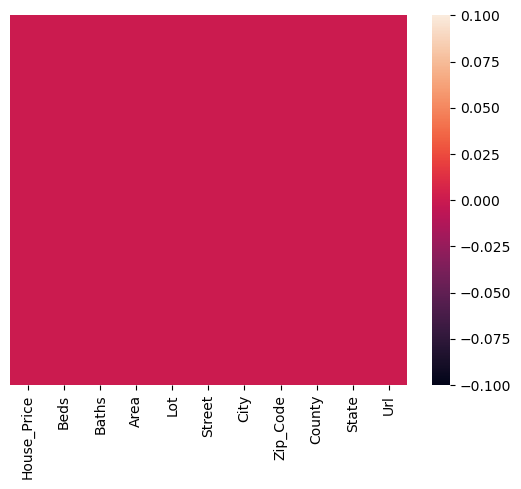

In [34]:
sns.heatmap(final_dataFrame.isnull(), yticklabels=False)

In [35]:

# Assume df is your original DataFrame
# Interpolate missing values in the entire DataFrame
dffilla = df.interpolate()

# Fill remaining missing values in the 'Lot' column with backward filling
dffilla['Lot'].fillna(method='bfill', inplace=True)

# Create a new DataFrame with the interpolated and backward-filled 'Lot' column
df_filled = pd.DataFrame(dffilla)

# Now df_filled contains the DataFrame with filled missing values in the 'Lot' column
print(df_filled)

     Unnamed: 0  House_Price  Beds  Baths     Area    Lot  \
0             0      1499000   5.0    3.0  2140.00  6,840   
1             1       375000   1.0    1.0   828.00  4,500   
2             2       725000   2.0    1.0  1134.00  4,500   
3             3      1549000   4.0    2.0  1450.00  4,500   
4             4      1199000   4.0    2.0  1561.00  7,811   
..          ...          ...   ...    ...      ...    ...   
534         534       849999   5.0    5.0    15.68    NaN   
535         535      1999900   5.0    5.0   479.59    NaN   
536         536       699995   5.0    5.0    17.75    NaN   
537         537       250000   5.0    5.0     0.71    NaN   
538         538       195000   5.0    5.0     0.24    NaN   

                      Street               City  Zip_Code            County  \
0          6790 Edgewater Ln          Livermore     94551     Alameda Conty   
1    1087 Murrieta Blvd #349          Livermore     94550     Alameda Conty   
2               22738 2nd St  

In [36]:
# Save the DataFrame as a CSV file
df_filled.to_csv('projectda.csv', index=False)

In [35]:
final_dataFrame.isnull().sum()

House_Price    0
Beds           0
Baths          0
Area           0
Lot            0
Street         0
City           0
Zip_Code       0
County         0
State          0
Url            0
dtype: int64

In [36]:
dfcleaned=final_dataFrame.dropna()
dfcleaned

,House_Price,Beds,Baths,Area,Lot,Street,City,Zip_Code,County,State,Url
0,1499000,5,3,2140,"6,840",6790 Edgewater Ln,Livermore,94551,Alameda Conty,CA,https://www.redfin.com/CA/Livermore/6790-Edgew...
1,375000,1,1,828,N/A,1087 Murrieta Blvd #349,Livermore,94550,Alameda Conty,CA,https://www.redfin.com/CA/Livermore/1087-Murri...
2,725000,2,1,1134,"4,500",22738 2nd St,Hayward,94541,Alameda Conty,CA,https://www.redfin.com/CA/Hayward/22738-2nd-St...
3,1549000,4,2,1450,"4,500",4474 Macbeth Cir,Fremont,94555,Alameda Conty,CA,https://www.redfin.com/CA/Fremont/4474-Macbeth...
4,1199000,4,2,1561,"7,811",236 Chalmette Rd,Livermore,94551,Alameda Conty,CA,https://www.redfin.com/CA/Livermore/236-Chalme...
...,...,...,...,...,...,...,...,...,...,...,...
533,849999,N/A,N/A,15.68,N/A,443A Alexander Ln,San Juan Bautista,95045,sanBenito County,CA,https://www.redfin.com/CA/San-Juan-Bautista/44...
534,1999900,N/A,N/A,479.59,N/A,20505 Coalinga Rd,Paicines,95043,sanBenito County,CA,https://www.redfin.com/CA/Paicines/20505-Coali...
535,699995,N/A,N/A,17.75,N/A,363 Orchard Hill Rd,San Juan Bautista,95045,sanBenito County,CA,https://www.redfin.com/CA/San-Juan-Bautista/36...
536,250000,N/A,N/A,0.71,N/A,0 Airline Hwy,Tres Pinos,95075,sanBenito County,CA,https://www.redfin.com/CA/Tres-Pinos/Airline-H...


In [37]:
dfcleaned.isnull().sum()

House_Price    0
Beds           0
Baths          0
Area           0
Lot            0
Street         0
City           0
Zip_Code       0
County         0
State          0
Url            0
dtype: int64

<Axes: >

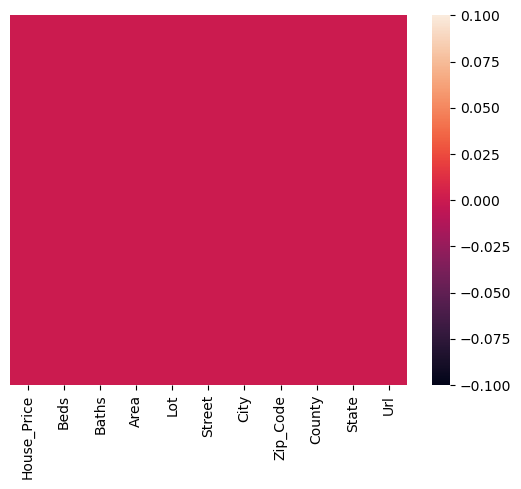

In [38]:
sns.heatmap(dfcleaned.isnull(), yticklabels=False)

In [39]:
dfcleaned.to_csv(r'C:\Users\STSC\Desktop\SPRING SEM 2024\BAN 612(DATA ANALYTICS)\Project\Cleaned_Data.csv')

In [40]:
df = pd.read_csv("C:/Users/STSC/Desktop/SPRING SEM 2024/BAN 612(DATA ANALYTICS)/Project/Cleaned_Data.csv")
df

,Unnamed: 0,House_Price,Beds,Baths,Area,Lot,Street,City,Zip_Code,County,State,Url
0,0,1499000,5.0,3.0,2140.00,"6,840",6790 Edgewater Ln,Livermore,94551,Alameda Conty,CA,https://www.redfin.com/CA/Livermore/6790-Edgew...
1,1,375000,1.0,1.0,828.00,NaN,1087 Murrieta Blvd #349,Livermore,94550,Alameda Conty,CA,https://www.redfin.com/CA/Livermore/1087-Murri...
2,2,725000,2.0,1.0,1134.00,"4,500",22738 2nd St,Hayward,94541,Alameda Conty,CA,https://www.redfin.com/CA/Hayward/22738-2nd-St...
3,3,1549000,4.0,2.0,1450.00,"4,500",4474 Macbeth Cir,Fremont,94555,Alameda Conty,CA,https://www.redfin.com/CA/Fremont/4474-Macbeth...
4,4,1199000,4.0,2.0,1561.00,"7,811",236 Chalmette Rd,Livermore,94551,Alameda Conty,CA,https://www.redfin.com/CA/Livermore/236-Chalme...
...,...,...,...,...,...,...,...,...,...,...,...,...
533,533,849999,NaN,NaN,15.68,NaN,443A Alexander Ln,San Juan Bautista,95045,sanBenito County,CA,https://www.redfin.com/CA/San-Juan-Bautista/44...
534,534,1999900,NaN,NaN,479.59,NaN,20505 Coalinga Rd,Paicines,95043,sanBenito County,CA,https://www.redfin.com/CA/Paicines/20505-Coali...
535,535,699995,NaN,NaN,17.75,NaN,363 Orchard Hill Rd,San Juan Bautista,95045,sanBenito County,CA,https://www.redfin.com/CA/San-Juan-Bautista/36...
536,536,250000,NaN,NaN,0.71,NaN,0 Airline Hwy,Tres Pinos,95075,sanBenito County,CA,https://www.redfin.com/CA/Tres-Pinos/Airline-H...


### here we still observe that there are some more NaN values, even they are not showed up in the heatmap above.

In [41]:
del df['Unnamed: 0']

In [42]:
df

,House_Price,Beds,Baths,Area,Lot,Street,City,Zip_Code,County,State,Url
0,1499000,5.0,3.0,2140.00,"6,840",6790 Edgewater Ln,Livermore,94551,Alameda Conty,CA,https://www.redfin.com/CA/Livermore/6790-Edgew...
1,375000,1.0,1.0,828.00,NaN,1087 Murrieta Blvd #349,Livermore,94550,Alameda Conty,CA,https://www.redfin.com/CA/Livermore/1087-Murri...
2,725000,2.0,1.0,1134.00,"4,500",22738 2nd St,Hayward,94541,Alameda Conty,CA,https://www.redfin.com/CA/Hayward/22738-2nd-St...
3,1549000,4.0,2.0,1450.00,"4,500",4474 Macbeth Cir,Fremont,94555,Alameda Conty,CA,https://www.redfin.com/CA/Fremont/4474-Macbeth...
4,1199000,4.0,2.0,1561.00,"7,811",236 Chalmette Rd,Livermore,94551,Alameda Conty,CA,https://www.redfin.com/CA/Livermore/236-Chalme...
...,...,...,...,...,...,...,...,...,...,...,...
533,849999,NaN,NaN,15.68,NaN,443A Alexander Ln,San Juan Bautista,95045,sanBenito County,CA,https://www.redfin.com/CA/San-Juan-Bautista/44...
534,1999900,NaN,NaN,479.59,NaN,20505 Coalinga Rd,Paicines,95043,sanBenito County,CA,https://www.redfin.com/CA/Paicines/20505-Coali...
535,699995,NaN,NaN,17.75,NaN,363 Orchard Hill Rd,San Juan Bautista,95045,sanBenito County,CA,https://www.redfin.com/CA/San-Juan-Bautista/36...
536,250000,NaN,NaN,0.71,NaN,0 Airline Hwy,Tres Pinos,95075,sanBenito County,CA,https://www.redfin.com/CA/Tres-Pinos/Airline-H...


In [43]:
df['Beds'].unique()

array([ 5.,  1.,  2.,  4.,  3.,  0.,  8., nan,  6., 12.,  7.])

In [44]:
df['Beds'].value_counts()

Beds
3.0     178
4.0     141
2.0      92
5.0      61
1.0      15
6.0      13
0.0       7
8.0       4
12.0      1
7.0       1
Name: count, dtype: int64

### Here we observe that there are some elements with 'nan'..so we will drop them

In [46]:
beds_ = ['Beds']  
df[beds_] = df[beds_].apply(pd.to_numeric, errors='coerce')

df = df.interpolate()
newBeds = df['Beds'].mode()

df['Beds'].fillna(newBeds, inplace=True)

In [47]:
df['Beds'].value_counts()

Beds
3.0     178
4.0     142
2.0      92
5.0      79
1.0      15
6.0      14
0.0       7
8.0       4
3.5       2
2.5       1
7.5       1
12.0      1
9.0       1
7.0       1
Name: count, dtype: int64

In [49]:
df['Beds'].unique()

array([ 5. ,  1. ,  2. ,  4. ,  3. ,  0. ,  8. ,  2.5,  6. ,  7.5, 12. ,
        9. ,  3.5,  7. ])

In [50]:
df

,House_Price,Beds,Baths,Area,Lot,Street,City,Zip_Code,County,State,Url
0,1499000,5.0,3.0,2140.00,"6,840",6790 Edgewater Ln,Livermore,94551,Alameda Conty,CA,https://www.redfin.com/CA/Livermore/6790-Edgew...
1,375000,1.0,1.0,828.00,NaN,1087 Murrieta Blvd #349,Livermore,94550,Alameda Conty,CA,https://www.redfin.com/CA/Livermore/1087-Murri...
2,725000,2.0,1.0,1134.00,"4,500",22738 2nd St,Hayward,94541,Alameda Conty,CA,https://www.redfin.com/CA/Hayward/22738-2nd-St...
3,1549000,4.0,2.0,1450.00,"4,500",4474 Macbeth Cir,Fremont,94555,Alameda Conty,CA,https://www.redfin.com/CA/Fremont/4474-Macbeth...
4,1199000,4.0,2.0,1561.00,"7,811",236 Chalmette Rd,Livermore,94551,Alameda Conty,CA,https://www.redfin.com/CA/Livermore/236-Chalme...
...,...,...,...,...,...,...,...,...,...,...,...
533,849999,5.0,5.0,15.68,NaN,443A Alexander Ln,San Juan Bautista,95045,sanBenito County,CA,https://www.redfin.com/CA/San-Juan-Bautista/44...
534,1999900,5.0,5.0,479.59,NaN,20505 Coalinga Rd,Paicines,95043,sanBenito County,CA,https://www.redfin.com/CA/Paicines/20505-Coali...
535,699995,5.0,5.0,17.75,NaN,363 Orchard Hill Rd,San Juan Bautista,95045,sanBenito County,CA,https://www.redfin.com/CA/San-Juan-Bautista/36...
536,250000,5.0,5.0,0.71,NaN,0 Airline Hwy,Tres Pinos,95075,sanBenito County,CA,https://www.redfin.com/CA/Tres-Pinos/Airline-H...


In [51]:
df['Area'].unique()

array([2.14000e+03, 8.28000e+02, 1.13400e+03, 1.45000e+03, 1.56100e+03,
       1.57600e+03, 1.75000e+03, 1.11600e+03, 1.34000e+03, 1.51400e+03,
       1.49800e+03, 5.81000e+02, 9.00000e+02, 5.65000e+02, 1.29400e+03,
       1.75600e+03, 2.46500e+03, 1.49000e+03, 5.55500e+03, 8.40000e+02,
       2.85100e+03, 1.50800e+03, 1.07600e+03, 2.70100e+03, 2.33500e+03,
       1.82900e+03, 4.45100e+03, 3.34300e+03, 1.02300e+03, 1.63900e+03,
       1.88300e+03, 1.97500e+03, 3.77000e+03, 1.42400e+03, 1.84200e+03,
       1.05600e+03, 1.69400e+03, 1.54100e+03, 2.04100e+03, 1.40200e+03,
       1.02000e+03, 1.05000e+03, 2.84500e+03, 1.70000e+03, 2.88900e+03,
       1.18300e+03, 9.87000e+02, 1.30000e+03, 5.05000e+03, 1.89600e+03,
       2.28300e+03, 1.09700e+03, 3.69100e+03, 1.94500e+03, 1.20000e+03,
       9.50000e+02, 6.90000e+02, 2.58000e+03, 5.06500e+03, 3.00100e+03,
       9.37000e+02, 1.35000e+03, 7.97000e+02, 1.19200e+03, 1.00000e+03,
       1.18900e+03, 1.42500e+03, 2.93000e+03, 1.22400e+03, 6.890

In [54]:
area_counts = df['Area'].value_counts()

# Check if 'Blur' exists in the index (unique values) of the 'area' counts
if 'N/A' in area_counts.index:
    # Get the count of 'Blur'
    nan_count = area_counts['N/A']
    print("Number of occurrences of 'N/A':", nan_count)
else:
    print("'N/A' not found in the 'Area' column.")

'N/A' not found in the 'Area' column.


In [55]:
df

,House_Price,Beds,Baths,Area,Lot,Street,City,Zip_Code,County,State,Url
0,1499000,5.0,3.0,2140.00,"6,840",6790 Edgewater Ln,Livermore,94551,Alameda Conty,CA,https://www.redfin.com/CA/Livermore/6790-Edgew...
1,375000,1.0,1.0,828.00,NaN,1087 Murrieta Blvd #349,Livermore,94550,Alameda Conty,CA,https://www.redfin.com/CA/Livermore/1087-Murri...
2,725000,2.0,1.0,1134.00,"4,500",22738 2nd St,Hayward,94541,Alameda Conty,CA,https://www.redfin.com/CA/Hayward/22738-2nd-St...
3,1549000,4.0,2.0,1450.00,"4,500",4474 Macbeth Cir,Fremont,94555,Alameda Conty,CA,https://www.redfin.com/CA/Fremont/4474-Macbeth...
4,1199000,4.0,2.0,1561.00,"7,811",236 Chalmette Rd,Livermore,94551,Alameda Conty,CA,https://www.redfin.com/CA/Livermore/236-Chalme...
...,...,...,...,...,...,...,...,...,...,...,...
533,849999,5.0,5.0,15.68,NaN,443A Alexander Ln,San Juan Bautista,95045,sanBenito County,CA,https://www.redfin.com/CA/San-Juan-Bautista/44...
534,1999900,5.0,5.0,479.59,NaN,20505 Coalinga Rd,Paicines,95043,sanBenito County,CA,https://www.redfin.com/CA/Paicines/20505-Coali...
535,699995,5.0,5.0,17.75,NaN,363 Orchard Hill Rd,San Juan Bautista,95045,sanBenito County,CA,https://www.redfin.com/CA/San-Juan-Bautista/36...
536,250000,5.0,5.0,0.71,NaN,0 Airline Hwy,Tres Pinos,95075,sanBenito County,CA,https://www.redfin.com/CA/Tres-Pinos/Airline-H...


In [56]:
area_counts = df['Lot'].value_counts()

# Check if 'Blur' exists in the index (unique values) of the 'area' counts
if 'N/A' in area_counts.index:
    # Get the count of 'Blur'
    nan_count = area_counts['N/A']
    print("Number of occurrences of 'N/A':", nan_count)
else:
    print("'N/A' not found in the 'Lot' column.")

'N/A' not found in the 'Lot' column.


In [57]:
df

,House_Price,Beds,Baths,Area,Lot,Street,City,Zip_Code,County,State,Url
0,1499000,5.0,3.0,2140.00,"6,840",6790 Edgewater Ln,Livermore,94551,Alameda Conty,CA,https://www.redfin.com/CA/Livermore/6790-Edgew...
1,375000,1.0,1.0,828.00,NaN,1087 Murrieta Blvd #349,Livermore,94550,Alameda Conty,CA,https://www.redfin.com/CA/Livermore/1087-Murri...
2,725000,2.0,1.0,1134.00,"4,500",22738 2nd St,Hayward,94541,Alameda Conty,CA,https://www.redfin.com/CA/Hayward/22738-2nd-St...
3,1549000,4.0,2.0,1450.00,"4,500",4474 Macbeth Cir,Fremont,94555,Alameda Conty,CA,https://www.redfin.com/CA/Fremont/4474-Macbeth...
4,1199000,4.0,2.0,1561.00,"7,811",236 Chalmette Rd,Livermore,94551,Alameda Conty,CA,https://www.redfin.com/CA/Livermore/236-Chalme...
...,...,...,...,...,...,...,...,...,...,...,...
533,849999,5.0,5.0,15.68,NaN,443A Alexander Ln,San Juan Bautista,95045,sanBenito County,CA,https://www.redfin.com/CA/San-Juan-Bautista/44...
534,1999900,5.0,5.0,479.59,NaN,20505 Coalinga Rd,Paicines,95043,sanBenito County,CA,https://www.redfin.com/CA/Paicines/20505-Coali...
535,699995,5.0,5.0,17.75,NaN,363 Orchard Hill Rd,San Juan Bautista,95045,sanBenito County,CA,https://www.redfin.com/CA/San-Juan-Bautista/36...
536,250000,5.0,5.0,0.71,NaN,0 Airline Hwy,Tres Pinos,95075,sanBenito County,CA,https://www.redfin.com/CA/Tres-Pinos/Airline-H...


In [63]:
df['Lot'].isnull().sum()

152

In [67]:
df.dtypes

House_Price      int64
Beds           float64
Baths          float64
Area           float64
Lot             object
Street          object
City            object
Zip_Code         int64
County          object
State           object
Url             object
dtype: object

In [68]:
df['Lot'] = df['Lot'].str.replace(',', '')

In [69]:
lot_median = df['Lot'].median()
df['Lot'].fillna(lot_median, inplace=True)

In [71]:
df.isnull().sum()

House_Price    0
Beds           0
Baths          0
Area           0
Lot            0
Street         0
City           0
Zip_Code       0
County         0
State          0
Url            0
dtype: int64

In [72]:
df.to_csv('cleaned_DataFrame.csv', index=False)

# END